<h1 style='font-weight:bold'><span style='color:#c35347'>Airbnb Listings Bangkok</span> | Analisis Data</h1>

<img src="images_1.jpeg" alt="Image" width="700"/>

<h2 style='font-weight:bold;'><span style='color:#c35347'>Latar Belakang</span></h2>

Airbnb adalah platform global yang **menyediakan layanan penyewaan akomodasi** dengan menghubungkan host dan wisatawan. Bangkok, sebagai salah satu kota tujuan wisata terbesar di Asia Tenggara, memiliki beragam pilihan akomodasi mulai dari kamar pribadi hingga apartemen.

Analisis ini berfokus pada dataset yang merinci **daftar listing Airbnb di Bangkok**. Dataset yang digunakan mencakup informasi penting seperti detail host, minimum durasi penyewaan, jenis kamar, harga harian, jumlah ulasan, dan ketersediaan.

Stakeholder utama dalam analisis ini adalah **tim marketing Airbnb Bangkok**. Dengan memberikan wawasan tentang karakteristik listing, strategi harga, tren ulasan, dan pola pemesananan berdasarkan waktu, analisis ini bertujuan untuk membantu tim marketing dalam merumuskan strategi yang dapat meningkatkan daya saing platform, mengoptimalkan kinerja operasional, dan memaksimalkan kepuasan pelanggan.

<h2 style='font-weight:bold;'><span style='color:#c35347'>Pernyataan Masalah</span></h2>

Sebagai seorang data analyst Airbnb, analisa daftar listing di Bangkok akan didasarkan pada ketiga pertanyaan berikut untuk mendukung keputusan strategis tim manajemen Airbnb Bangkok.

1. **Bagaimana Sebaran dan Potensi Pasar Listing Airbnb di Berbagai Wilayah Bangkok?**

    Dengan menganalisis distribusi listing di setiap wilayah, kita dapat mengidentifikasi area dengan pertumbuhan tinggi dan area yang kurang berkembang. Hal ini penting untuk memandu strategi ekspansi, pemasaran, dan alokasi sumber daya oleh tim manajemen.
    
2. **Kapan Periode Puncak Pemesanan Listing di Bangkok, dan Bagaimana Kita Dapat Mengoptimalkannya?**

    Dengan menganalisis pola pemesanan berdasarkan bulan dan wilayah, tim manajemen dapat merencanakan kampanye pemasaran musiman, penyesuaian harga, dan penawaran promosi. Memahami periode puncak ini juga membantu dalam meningkatkan pendapatan di waktu-waktu strategis.

<h2 style='font-weight:bold;color:#c35347'>Import Data<span style='color:#FFFFFF'></span></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import folium

from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(5)

id                                               name  \
2949             17164516             LIKE HOME  , CLEAN , SAFE & CONVENIENT   
8236             36089493  Centrally Located 5 Minutes to BTS Ratchathewi...   
11815            52660517  Rhythm Sukhumvit 50 Condo\n35 Sq.m\nFully furn...   
302               1629978                               iSanook Eco Studio 7   
13038  641632795588095737      【K03】Sathorn金融中心全新高端公寓1+1房&屋顶无边泳池+Gym&近BTS轻轨站   

         host_id      host_name neighbourhood  latitude  longitude  \
2949    52203058      Veerachai      Bang Rak  13.72968  100.51840   
8236   270210774     Sakaowadee   Ratchathewi  13.74940  100.53304   
11815  192497186      Chonticha   Khlong Toei  13.70553  100.59955   
302      8663142  ISanook Hotel      Bang Rak  13.73244  100.52204   
13038  202660676        Cheathy        Sathon  13.71801  100.53396   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2949       Shared room    440               1                  0         NaN   
8236      Private room   5000               1                  0         NaN   
11815  Entire home/apt   1250              30                  3  2022-10-09   
302       Private room   1800              30                 21  2020-04-11   
13038  Entire home/apt   1000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2949                 NaN                               7               181   
8236                 NaN                               8               302   
11815               0.43                               1               297   
302                 0.19                              45               336   
13038                NaN                              14               233   

       number_of_reviews_ltm  
2949                       0  
8236                       0  
11815                      3  
302                        0  
13038                      0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

> **Data Dictionary**

| **Field Name**                        | **Description**                                                                                                                                 |
|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                                  | Airbnb's unique identifier for the listing.                                                                                                     |
| `name`                                | Name of the listing.                                                                                                                            |
| `host_id`                             | Airbnb's unique identifier for the host/user.                                                                                                   |
| `host_name`                           | Name of the host. Usually, just the first name(s).                                                                                               |
| `neighborhood`                        | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.             |
| `latitude`                            | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                    |
| `longitude`                           | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                    |
| `room_type`                           | The type of room listed (e.g., Entire home/apt, Private room, Shared room).                                                                      |
| `price`                               | Daily price in local currency. Note, the $ sign may be used despite the locale.                                                                  |
| `minimum_nights`                      | The minimum number of night stays for the listing (calendar rules may differ).                                                                   |
| `number_of_reviews`                   | The number of reviews the listing has.                                                                                                           |
| `last_review`                         | The date of the last/newest review.                                                                                                              |
| `calculated_host_listings_count`      | The number of listings the host has in the current scrape in the city/region geography.                                                           |
| `availability_365`                    | The calendar determines the availability of the listing x days in the future. Note a listing may be unavailable because it has been booked or blocked by the host. |
| `number_of_reviews_ltm`               | The number of reviews the listing has received in the last 12 months.                                                                             |

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Missing Values</span></h2>

In [4]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

> **Terdapat 4 fitur yang memiliki missing values:**
> - **[`name`] -> judul listing**
> - **[`host_name`] -> nama host dari listing**
> - **[`last_review`] -> tanggal pemberian review terakhir**
> - **[`reviews_per_month`] -> frekuensi review per bulan**



In [5]:
# fitur name

temp = df[['name', 'host_name', 'last_review', 'reviews_per_month']]
percentage_missing = []

for col in temp.columns:
    null_percentage = temp[col].isna().sum() / len(temp[col])
    
    percentage_missing.append({'feature': col, 'null_percentage': f"{round((null_percentage*100), 2)}%"})

pd.DataFrame(percentage_missing)    
    

feature null_percentage
0               name           0.05%
1          host_name           0.01%
2        last_review          36.52%
3  reviews_per_month          36.52%

In [6]:
df.dropna(subset=['name', 'host_name'], inplace=True)

df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

> - **Karena jumlah missing value pada fitur [`name`] dan [`host_name`] sangat kecil dan tidak berpengaruh signifikan terhadap analisis, maka lebih baik dilakukan drop row**

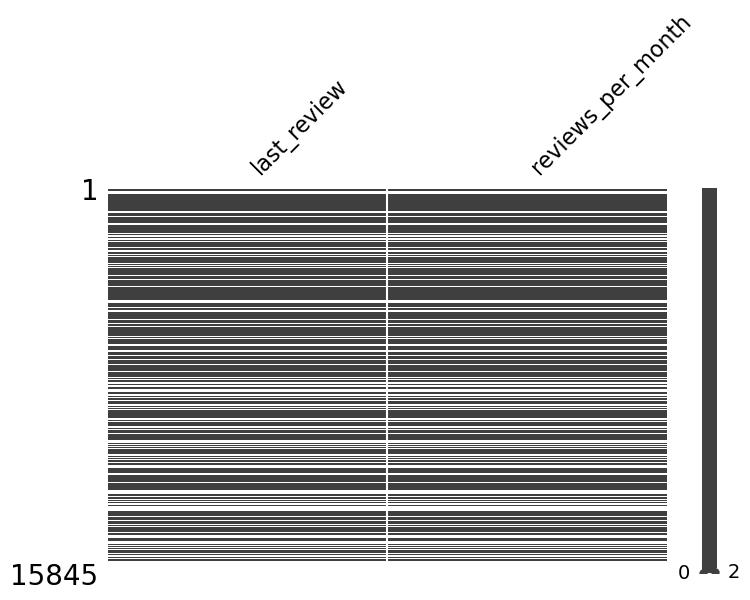

In [7]:
msno.matrix(df[['last_review', 'reviews_per_month']], figsize=(8,5))

plt.show()

> - **Karena missing value pada fitur [`last_review`] dan [`reviews_per_month`] memiliki pattern dan bukan MCAR (missing completely at random), maka tidak bisa dilakukan drop secara asal.**
> - **Pattern yang didapatkan disini paralel, setiap kali ada missing value pada satu fitur, maka fitur yang lain juga missing.**
> - **Hal ini wajar karena jika suatu listing belum memiliki review maka tidak mungkin memiliki frekuensi review per bulan.**

In [8]:
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna('1900-01-01', inplace=True)

display(df.info(),df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15845 non-null  int64  
 1   name                            15845 non-null  object 
 2   host_id                         15845 non-null  int64  
 3   host_name                       15845 non-null  object 
 4   neighbourhood                   15845 non-null  object 
 5   latitude                        15845 non-null  float64
 6   longitude                       15845 non-null  float64
 7   room_type                       15845 non-null  object 
 8   price                           15845 non-null  int64  
 9   minimum_nights                  15845 non-null  int64  
 10  number_of_reviews               15845 non-null  int64  
 11  last_review                     15845 non-null  object 
 12  reviews_per_month               15845

None

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

> - **Missing value pada fitur [`last_review`] akan di-impute dengan data waktu `1900-01-01` yang menandakan belum adanya review (hal ini penting karena nanti fitur [`last_review`] akan diubah menjadi `datetime`)**
> - **Missing value pada fitur [`reviews_per_month`] akan di-impute dengan data `0` yang menandakan belum adanya frekuensi review per bulan**
> - **Data berkurang sebanyak `9` dari jumlah `15854` menjadi `15845`**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Duplicates</span></h2>

In [9]:
cols = ['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']

data_duplicates = df[df[cols].duplicated()]

data_duplicates

id                                             name  \
5976             28907857                        NA BANGLAMPOO GUEST HOUSE   
8790             37954129                                           small1   
15186  765691389894680033          Sathon Luxury 2 br/China Town/Icon Siam   
15191  765721954905526928          Sathon Luxury 2 br/China Town/Icon Siam   
15550  781514912980696908  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15615  780896408611028752  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15831  790280473547745220                         Family Room for 4 People   

         host_id host_name neighbourhood   latitude   longitude  \
5976    87704107       Yui   Phra Nakhon  13.762790  100.497900   
8790    97598307       Soo    Don Mueang  13.920720  100.575780   
15186  264864968    Tricia        Sathon  13.710777  100.519891   
15191  344327171     Alice        Sathon  13.710777  100.519891   
15550   20133201    Willam   Huai Khwang  13.756184  100.568269   
15615  344327171     Alice   Huai Khwang  13.757097  100.568486   
15831  340188343    Rachan       Vadhana  13.740168  100.556320   

             room_type  price  minimum_nights  number_of_reviews last_review  \
5976      Private room   1400               1                  0  1900-01-01   
8790       Shared room    350               1                  0  1900-01-01   
15186  Entire home/apt   2221               1                  0  1900-01-01   
15191  Entire home/apt   2221               1                  0  1900-01-01   
15550  Entire home/apt   2533               3                  0  1900-01-01   
15615  Entire home/apt   2533               3                  0  1900-01-01   
15831     Private room   2237               1                  0  1900-01-01   

       reviews_per_month  calculated_host_listings_count  availability_365  \
5976                 0.0                               9               361   
8790                 0.0                               4               180   
15186                0.0                              44               340   
15191                0.0                              40               340   
15550                0.0                              33               360   
15615                0.0                              40               360   
15831                0.0                              14               360   

       number_of_reviews_ltm  
5976                       0  
8790                       0  
15186                      0  
15191                      0  
15550                      0  
15615                      0  
15831                      0

In [10]:
df = df.drop(data_duplicates.index)

df[cols].duplicated().sum()

0

> - **Terdapat `7` data listing duplikat yang kemungkinan terjadi karena error pada sistem.**
> - **Disini [`id`] tidak dimasukkan dalam pengecekan karena setiap listing memiliki [`id`] yang unik ketika di-generate**

In [11]:
cols = ['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type']

data_duplicates = df[df.duplicated(subset=cols, keep=False)]

data_duplicates.head()

id                                              name   host_id  \
486    4639962  Sukhumvit, 5 min walk to Sky Train Asoke Station  24021888   
1162   7717620  Sukhumvit, 5 min walk to Sky Train Asoke Station  24021888   
2119  13777582   Studio with Zen garden view (30sqm), LUXX Silom  68154488   
3329  18396802              Studio for 2PAX: 1-Min from BTS Nana   3773805   
3473  19000129              Studio for 2PAX: 1-Min from BTS Nana   3773805   

                       host_name neighbourhood  latitude  longitude  \
486   Maitria Hotel Sukhumvit 18   Khlong Toei  13.73313  100.56259   
1162  Maitria Hotel Sukhumvit 18   Khlong Toei  13.73313  100.56259   
2119                     Dusadee      Bang Rak  13.72633  100.52531   
3329             Danai And BicGy   Khlong Toei  13.73937  100.55521   
3473             Danai And BicGy   Khlong Toei  13.73937  100.55521   

            room_type  price  minimum_nights  number_of_reviews last_review  \
486      Private room   4871               1                 27  2022-07-11   
1162     Private room   4871               1                 20  2019-08-08   
2119       Hotel room   1777               1                  1  2017-03-18   
3329  Entire home/apt   2470               2                 63  2022-01-14   
3473  Entire home/apt   2470               2                 71  2022-12-26   

      reviews_per_month  calculated_host_listings_count  availability_365  \
486                0.28                              12               364   
1162               0.30                              12               364   
2119               0.01                              62               271   
3329               0.93                              13               325   
3473               1.06                              13               343   

      number_of_reviews_ltm  
486                       1  
1162                      0  
2119                      0  
3329                      1  
3473                     18

In [12]:
data_duplicates_sorted = data_duplicates.sort_values('last_review', ascending=False)

df = df.drop_duplicates(subset=cols, keep='first')

df[cols].duplicated().sum()

0

> - **Terdapat `46` data listing duplikat yang memiliki detail yang sama tetapi berbeda pada data-data seperti harga, review, dan ketersediaan.**
> - **Disini kita memilih untuk melakukan drop pada data yang memiliki [`last_review`] lebih lampau untuk mendapatkan data listing terkini**

In [13]:
len(df)

15792

> - **Data berkurang sebanyak `53` dari jumlah `15845` menjadi `15792`**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Data Formatting</span></h2>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15792 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15792 non-null  int64  
 1   name                            15792 non-null  object 
 2   host_id                         15792 non-null  int64  
 3   host_name                       15792 non-null  object 
 4   neighbourhood                   15792 non-null  object 
 5   latitude                        15792 non-null  float64
 6   longitude                       15792 non-null  float64
 7   room_type                       15792 non-null  object 
 8   price                           15792 non-null  int64  
 9   minimum_nights                  15792 non-null  int64  
 10  number_of_reviews               15792 non-null  int64  
 11  last_review                     15792 non-null  object 
 12  reviews_per_month               15792

In [15]:
df['id'] = df['id'].astype('object')
df['host_id'] = df['host_id'].astype('object')
df['room_type'] = df['room_type'].astype('category')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15792 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15792 non-null  object        
 1   name                            15792 non-null  object        
 2   host_id                         15792 non-null  object        
 3   host_name                       15792 non-null  object        
 4   neighbourhood                   15792 non-null  object        
 5   latitude                        15792 non-null  float64       
 6   longitude                       15792 non-null  float64       
 7   room_type                       15792 non-null  category      
 8   price                           15792 non-null  int64         
 9   minimum_nights                  15792 non-null  int64         
 10  number_of_reviews               15792 non-null  int64         
 11  last_re

> - **Fitur [`id`] dan [`host_id`] di-konversikan menjadi data type `object` karena merupakan unique identifiers dan tidak akan dilakukan operasi numerik**
> - **Fitur [`room_type`] di-konversikan menjadi data type `category` karena merupakan data kategorikal yang memiliki value terbatas**
> - **Fitur [`last_review`] di-konversikan menjadi data type `datetime` karena merupakan periode waktu dan dibutuhkan untuk operasi seputar tipe data `Date`**

In [17]:
df[['reviews_per_month']].sample(5)

reviews_per_month
2376                0.00
2654                0.16
3134                0.00
9452                0.00
13578               0.00

> - **Fitur [`reviews_per_month`] sudah ter-standarisasi dengan 2 decimal points setelah koma**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Data Range Constraints</span></h2>

In [18]:
display(df.describe())

pd.DataFrame(df.select_dtypes(include='number').columns).rename(columns={0:'features'})

latitude     longitude         price  minimum_nights  \
count  15792.000000  15792.000000  1.579200e+04    15792.000000   
mean      13.745163    100.559905  3.222907e+03       15.339096   
min       13.527300    100.329550  0.000000e+00        1.000000   
25%       13.720147    100.529700  9.000000e+02        1.000000   
50%       13.738515    100.561430  1.426000e+03        1.000000   
75%       13.759522    100.585170  2.443000e+03        7.000000   
max       13.953540    100.923440  1.100000e+06     1125.000000   
std        0.043050      0.050940  2.502088e+04       50.907869   

       number_of_reviews                    last_review  reviews_per_month  \
count       15792.000000                          15792       15792.000000   
mean           16.694972  1977-04-20 22:13:02.370820640           0.516097   
min             0.000000            1900-01-01 00:00:00           0.000000   
25%             0.000000            1900-01-01 00:00:00           0.000000   
50%             2.000000            2020-01-13 00:00:00           0.090000   
75%            14.000000            2022-11-22 00:00:00           0.670000   
max          1224.000000            2022-12-28 00:00:00          19.130000   
std            40.671599                            NaN           0.953250   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15792.000000      15792.000000           15792.000000  
mean                        13.695035        244.041983               3.487209  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        137.000000               0.000000  
50%                          4.000000        308.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000  
std                         29.668330        125.908397               8.928481

features
0                        latitude
1                       longitude
2                           price
3                  minimum_nights
4               number_of_reviews
5               reviews_per_month
6  calculated_host_listings_count
7                availability_365
8           number_of_reviews_ltm

In [19]:
# latitude and longitude

false_range_latitude = df[~((df['latitude'] >= -90) & (df['latitude'] <= 90))]
false_range_longitude = df[~((df['longitude'] >= -180) & (df['longitude'] <= 180))]

display(false_range_latitude, false_range_longitude)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

> - **Fitur [`latitude`] dan [`longitude`] tidak memiliki data diluar range kemungkinan**

In [20]:
# price

false_range_price = df[~ (df['price'] > 0)]

display(false_range_price)

# drop data
df = df[(df['price'] > 0)]

id                           name    host_id  \
11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0  1900-01-01   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                0.0                               1                 0   

       number_of_reviews_ltm  
11103                      0

> - **Fitur [`price`] memiliki `1` data diluar range kemungkinan (harga 0)**

In [21]:
# minimum_nights

false_range_minimum_nights = df[~ (df['minimum_nights'] > 0)]

display(false_range_minimum_nights)

# drop data
df = df[(df['minimum_nights'] > 0)]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

> - **Fitur [`minimum_nights`] memiliki tidak memiliki data diluar range kemungkinan (minimal penyewaan 0 hari)**

In [22]:
# number_of_reviews, reviews_per_month, calculated_host_listing_count, number_of_reviews_ltm

false_range_number_of_reviews = df[~ (df['number_of_reviews'] >= 0)].head()
false_range_reviews_per_month = df[~ (df['reviews_per_month'] >= 0)].head()
false_range_calculated_host_listings_count = df[~ (df['calculated_host_listings_count'] > 0)].head()
false_range_number_of_reviews_ltm = df[~ (df[
    'number_of_reviews_ltm'] >= 0)].head()

display(false_range_number_of_reviews, false_range_reviews_per_month, false_range_calculated_host_listings_count, false_range_number_of_reviews_ltm)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

> - **Fitur [`number_of_reviews`], [`reviews_per_month`], [`calculated_host_listing_count`], dan [`number_of_reviews_ltm`] tidak memiliki data diluar range kemungkinan (value minus ataupun 0 untuk jumlah listing host)**

In [23]:
# availability_365

false_range_availibility_365= df[~ ((df['availability_365'] >= 0) & (df['availability_365'] <= 365))]

display(false_range_availibility_365)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

> - **Fitur [`availability_365`] tidak memiliki data diluar range (listing dengn ketersediaan 0 diasumsikan sudah `fully booked`).**

In [24]:
len(df)

15791

> - **Data berkurang sebanyak `1` dari jumlah `15792` menjadi `15791`**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Geospatial</span></h2>

In [25]:
# latitude and longitude for Bangkok
valid_latitude_range = (13.4, 14.2)
valid_longitude_range = (100.2, 100.9)

invalid_coordinates = df[
    (df['latitude'] < valid_latitude_range[0]) | 
    (df['latitude'] > valid_latitude_range[1]) |
    (df['longitude'] < valid_longitude_range[0]) | 
    (df['longitude'] > valid_longitude_range[1])
]

df[df.index.isin(invalid_coordinates.index)]

id                                             name    host_id  \
8072  35722212            Life @ Morning farm (Royal Exclusive)  268710525   
8099  35744484                LIFE @MorningFarm (Royal suite I)  268710525   
9218  39588301  Bann - Chang Homestay and Countryside pluralist  167328806   

     host_name neighbourhood  latitude  longitude        room_type  price  \
8072     Nimit     Nong Chok  13.80841  100.92328  Entire home/apt   4200   
8099     Nimit     Nong Chok  13.81066  100.92344  Entire home/apt   3286   
9218       Ded     Nong Chok  13.87757  100.90546     Private room   1000   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
8072               2                  0  1900-01-01                0.0   
8099               2                  0  1900-01-01                0.0   
9218               1                  0  1900-01-01                0.0   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
8072                               2               365                      0  
8099                               2               365                      0  
9218                               1                83                      0

> - **Bangkok `latitude` range (13.4, 14.2)**
> - **Bangkok `longitude` range (100.2, 100.95)**
> - **Tidak terdapat data listing yang diluar area `latitude` dan `longitude` Bangkok, Thailand.**

In [26]:
# slightly incorrect neighbourhood spelling mapping
neighborhood_mapping = {
    'Bang Kho laen': 'Bang Kho Laem',
    'Chatu Chak': 'Chatuchak',
    'Wang Thong Lang': 'Wang Thonglang',
    'Parthum Wan': 'Pathum Wan',
    'Pra Wet': 'Prawet',
    'Yan na wa': 'Yan Nawa',
    'Thung khru': 'Thung Khru',
    'Bang Khun thain': 'Bang Khun Thian',
    'Thon buri': 'Thon Buri'
}

def correct_neighborhood_names(df, column, mapping):
    df[column] = df[column].replace(mapping)
    return df

# Example usage
df = correct_neighborhood_names(df, 'neighbourhood', neighborhood_mapping)

df[['neighbourhood']].value_counts().reset_index()


neighbourhood  count
0                Vadhana   2148
1            Khlong Toei   2085
2            Huai Khwang   1122
3            Ratchathewi   1108
4               Bang Rak    823
5                 Sathon    799
6            Phra Nakhon    617
7           Phra Khanong    552
8              Chatuchak    546
9                Bang Na    457
10            Pathum Wan    454
11             Din Daeng    443
12            Phaya Thai    421
13             Suanluang    381
14            Khlong San    357
15             Bang Kapi    259
16              Bang Sue    248
17            Bang Phlat    214
18              Yan Nawa    200
19             Thon Buri    182
20            Don Mueang    166
21                Prawet    156
22         Phasi Charoen    155
23           Bangkok Noi    152
24           Lat Krabang    148
25         Bang Kho Laem    140
26                Lak Si    126
27  Pom Prap Sattru Phai    123
28             Bang Khen    116
29        Samphanthawong    114
30        Wang Thonglang    100
31             Bang Khae     92
32                 Dusit     91
33           Bangkok Yai     90
34            Chom Thong     74
35              Min Buri     62
36             Lat Phrao     57
37           Khan Na Yao     55
38             Bueng Kum     54
39            Rat Burana     53
40           Taling Chan     50
41           Saphan Sung     45
42               Sai Mai     40
43         Khlong Sam Wa     32
44            Thung Khru     23
45       Bang Khun Thian     21
46             Nong Chok     14
47        Thawi Watthana     12
48            Nong Khaem      9
49              Bang Bon      5

> - **Fitur `neighbourhoods` memiliki 50 unik data, dan terdapat 9 `spelling mistake` yang sudah di-standarisasi.**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Feature Engineering</span></h2>

In [27]:
def determine_area(row):
    if row['neighbourhood'] in ['Pathum Wan', 'Ratchathewi', 'Phaya Thai', 'Samphanthawong', 'Sathon', 'Bang Rak', 'Pom Prap Sattru Phai', 'Dusit', 'Khlong San', 'Huai Khwang', 'Phra Nakhon']:
        return 'Central Business District (CBD)'
    elif row['neighbourhood'] in ['Chatuchak', 'Lat Phrao', 'Bang Khen', 'Don Mueang', 'Lak Si', 'Din Daeng', 'Bang Sue', 'Bang Phlat', 'Wang Thonglang', 'Bangkok Yai', 'Chom Thong', 'Khan Na Yao', 'Bueng Kum', 'Rat Burana', 'Sai Mai', 'Khlong Sam Wa']:
        return 'Northern Residential Areas'
    elif row['neighbourhood'] in ['Bang Na', 'Khlong Toei', 'Vadhana', 'Suanluang', 'Prawet', 'Bang Kapi', 'Saphan Sung', 'Min Buri', 'Lat Krabang', 'Nong Chok', 'Thawi Watthana', 'Nong Khaem']:
        return 'Eastern Growth Areas'
    elif row['neighbourhood'] in ['Bangkok Noi', 'Taling Chan', 'Thon Buri', 'Bang Khae', 'Bang Khun Thian', 'Thung Khru', 'Bang Bon', 'Phasi Charoen']:
        return 'Western Traditional and Residential Areas'
    elif row['neighbourhood'] in ['Yan Nawa', 'Bang Kho Laem', 'Phra Khanong']:
        return 'Southern Business and Port Areas'
    else:
        return 'Unknown'

df['area_category'] = df.apply(determine_area, axis=1)

df.sample(5)

id                                               name  \
2283             14116054        Riverside Studio Flat (Infinity Pool & Gym)   
14740  738027691789704884  Lovely 2-bedroom serviced apartment near BTS &...   
5392             27176069                           Convenient place to stay   
5855             28805360             THE FEELING LOVE : 1 BR /WIFI/POOL/MRT   
13268  660824615608424665                      อพาร์ตเมนต์ใกล้ห้างสรรพสินค้า   

         host_id   host_name neighbourhood   latitude   longitude  \
2283    47732587        Mook     Thon Buri  13.707220  100.495370   
14740   49683163   Jarungjit      Bang Rak  13.727480  100.536660   
5392   187609725  Pongsakorn       Bang Na  13.677150  100.622590   
5855   133082557        Jean   Huai Khwang  13.759120  100.570300   
13268  466944232      Teresa    Bang Phlat  13.784309  100.477489   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2283      Private room   1400               3                 52  2020-02-01   
14740  Entire home/apt   2600               1                  1  2022-11-14   
5392      Private room    900               1                  0  1900-01-01   
5855   Entire home/apt   2143               1                 58  2022-12-01   
13268  Entire home/apt   1200               7                  1  2022-07-15   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2283                0.66                               1               349   
14740               0.67                               8               360   
5392                0.00                               1               365   
5855                1.13                              19                80   
13268               0.18                               1               149   

       number_of_reviews_ltm                              area_category  
2283                       0  Western Traditional and Residential Areas  
14740                      1            Central Business District (CBD)  
5392                       0                       Eastern Growth Areas  
5855                      15            Central Business District (CBD)  
13268                      1                 Northern Residential Areas

> 1. **Central Business District (CBD)**: Area ini mencakup bagian komersial tertinggi dan paling populer di Bangkok, dengan traffic tinggi dan potensi harga premium.
> 2. **Northern Residential Areas**: Lingkungan ini sebagian besar residensial dengan beberapa kehadiran bisnis/komersial, menawarkan opsi harga menengah dan ramah keluarga.
> 3. **Eastern Growth Areas**: Kategori ini mencakup distrik bisnis yang sedang berkembang dan area residensial yang mengalami ekspansi, ideal untuk mengidentifikasi pasar yang sedang berkembang.
> 4. **Western Traditional and Residential Areas**: Area ini lebih tradisional dan residensial dengan signifikansi historis.
> 5. **Southern Business and Port Areas**: Kategori ini mencakup area industri dan pelabuhan serta lingkungan residensial.

In [28]:
df['area_category'].value_counts()

area_category
Central Business District (CBD)              6029
Eastern Growth Areas                         5776
Northern Residential Areas                   2414
Southern Business and Port Areas              892
Western Traditional and Residential Areas     680
Name: count, dtype: int64

In [29]:
df['review_month'] = pd.to_datetime(df['last_review']).dt.strftime('%B')

# Estimasi starting date untuk setiap listing
df['estimated_starting_date'] = df.apply(
    lambda row: row['last_review'] - pd.to_timedelta((row['number_of_reviews'] / row['reviews_per_month']) * 30, unit='D')
    if row['reviews_per_month'] > 0 else pd.NaT,
    axis=1
)
df['estimated_starting_year'] = df['estimated_starting_date'].dt.year.fillna(1900).astype(int)
df.drop(columns=['estimated_starting_date'], inplace=True)

df.sample(5)

id                                               name  \
3202             18202575  8KM FROM SHOPPING MALL TERMINAL 21 ASOK - ROOM...   
706               6246437  Studio Queen Bed @ Lee Place Bangkok Phatthanakan   
12319  548830892436190869           Luxury Service Apartment - Three Bedroom   
865               5907871                1 min BTS / Cola House / Cozy /WIFI   
2532             15988385                PG Rama9, 3 Min MRT Central,Fortune   

         host_id     host_name neighbourhood  latitude  longitude  \
3202    44305808  Lek Boonsiri       Vadhana  13.72921  100.59618   
706     32432579      Ravieroj        Prawet  13.72353  100.65720   
12319  442284362          Vivi       Vadhana  13.72859  100.57984   
865     30327274          Nate  Phra Khanong  13.69762  100.60626   
2532   103893580       Songsak   Huai Khwang  13.75613  100.56791   

             room_type  price  minimum_nights  number_of_reviews last_review  \
3202        Hotel room   1143               1                  0  1900-01-01   
706    Entire home/apt    693               1                  0  1900-01-01   
12319  Entire home/apt  10429               1                  0  1900-01-01   
865    Entire home/apt    800               3                 72  2022-12-18   
2532   Entire home/apt   1000              26                  8  2022-05-18   

       reviews_per_month  calculated_host_listings_count  availability_365  \
3202                0.00                              41               365   
706                 0.00                               8               365   
12319               0.00                               3               223   
865                 0.80                               2               321   
2532                0.11                               1                46   

       number_of_reviews_ltm                     area_category review_month  \
3202                       0              Eastern Growth Areas      January   
706                        0              Eastern Growth Areas      January   
12319                      0              Eastern Growth Areas      January   
865                        2  Southern Business and Port Areas     December   
2532                       1   Central Business District (CBD)          May   

       estimated_starting_year  
3202                      1900  
706                       1900  
12319                     1900  
865                       2015  
2532                      2016

> - **Fitur `review_month` dan `estimated_starting_date` diperlukan untuk melakukan analisis trend listing berbasis waktu pada setiap wilayah.**

<h2 style='font-weight:bold;color:#c35347'>Data Cleaning: <span style='color:#FFFFFF'>Outliers</span></h2>

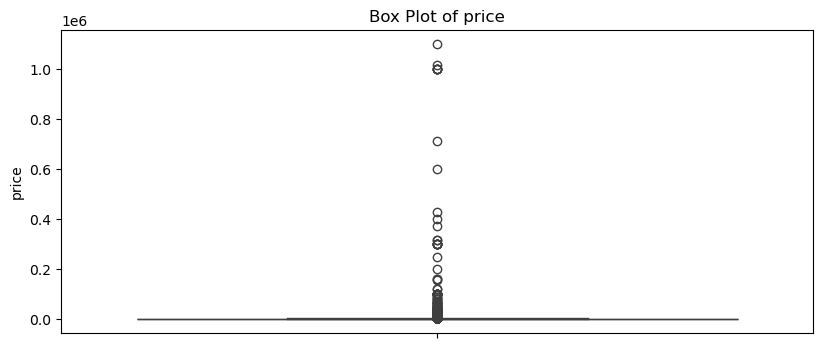

In [30]:
cols = ['price']

plt.figure(figsize=(16, 10))

for i, var in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

> - **Dari kolom numerik ini, dapat terlihat `outliers` yang berada di sekitar `upper whisker`**
> - **Fokus pada bagian ini adalah membersihkan data dari `extreme outliers` yang dapat menurunkan kualitas analisis secara signifikan. Data tersebut biasanya sangat jauh dari sebaran data**

In [31]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

### Price

In [32]:
price_outliers, lb, ub = identify_outliers_iqr(df, 'price')
price_extreme_outliers, lb, ub = identify_outliers_iqr(price_outliers, 'price')

print(f'Upperbound: {ub}')
print(f'Lowerbound: {lb}')
price_extreme_outliers[['price']].describe()

Upperbound: 18605.0
Lowerbound: -2363.0


price
count  1.510000e+02
mean   1.227605e+05
std    2.256233e+05
min    1.864300e+04
25%    2.353950e+04
50%    3.463100e+04
75%    1.000000e+05
max    1.100000e+06

> - **`Extreme outliers` pada fitur [`price`] memiliki nilai upperbound sekitar `18605 THB (thailand baht)`.**
> - **Jika dikonversikan ke rupiah, sekitar `Rp. 8,452,488` per hari. Hal ini sesuai dengan data pada website Airbnb Bangkok yang menunjukkan rata-rata listing harga jauh dibawah itu.**

In [33]:
temp = df.copy()

df = df.drop(price_extreme_outliers.index)
df[['price']].describe()

price
count  15640.000000
mean    2069.009271
std     2137.837331
min      278.000000
25%      900.000000
50%     1400.000000
75%     2380.250000
max    18355.000000

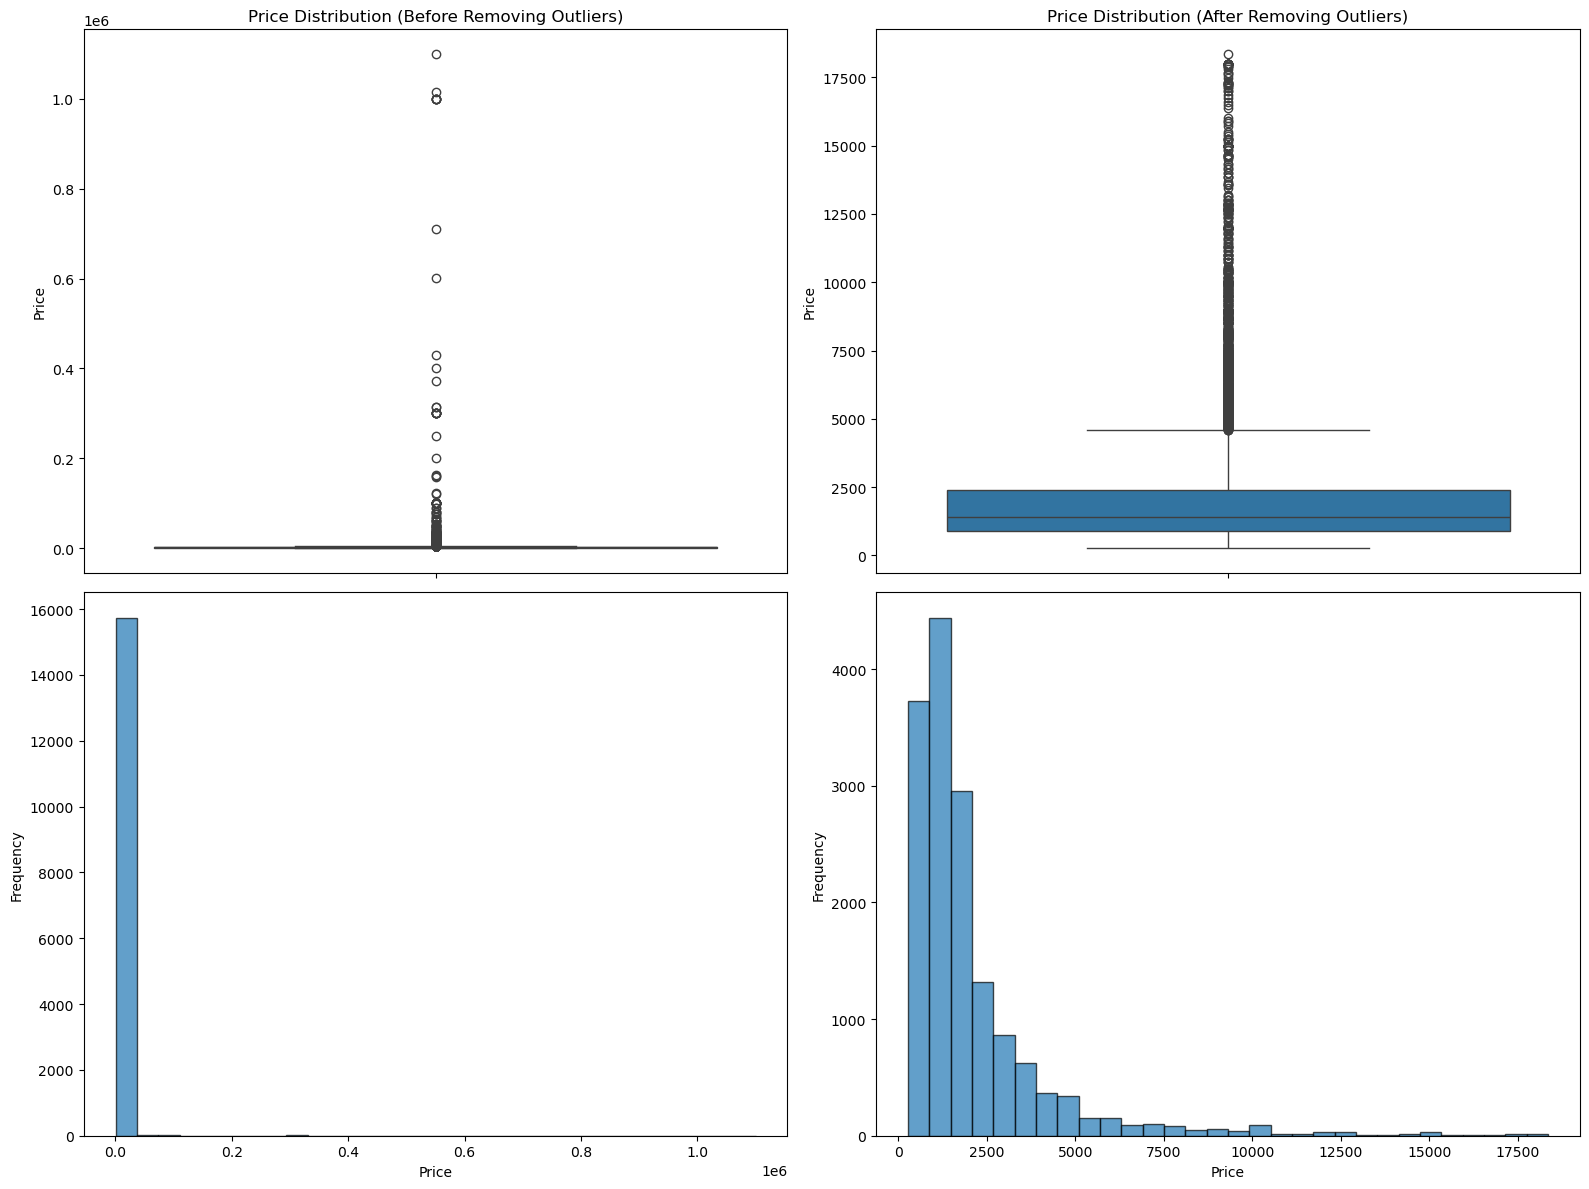

In [34]:
plt.figure(figsize=(16, 12))

# Boxplots
plt.subplot(2, 2, 1)
sns.boxplot(temp['price'])
plt.title('Price Distribution (Before Removing Outliers)')
plt.ylabel('Price')

plt.subplot(2, 2, 2)
sns.boxplot(df['price'])
plt.title('Price Distribution (After Removing Outliers)')
plt.ylabel('Price')

# Histograms
plt.subplot(2, 2, 3)
plt.hist(temp['price'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['price'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.tight_layout()
plt.show()

### Minimum Nights

In [35]:
minimum_nights_outliers, lb, ub = identify_outliers_iqr(df, 'minimum_nights')
minimum_nights_extreme_outliers, lb, ub = identify_outliers_iqr(minimum_nights_outliers, 'minimum_nights')

print(f'Upperbound: {ub}')
print(f'Lowerbound: {lb}')
minimum_nights_extreme_outliers[['minimum_nights']].describe()

Upperbound: 73.625
Lowerbound: 0.625


minimum_nights
count      649.000000
mean       203.812018
std        138.786602
min         75.000000
25%         90.000000
50%        180.000000
75%        360.000000
max       1125.000000

> - **`Extreme outliers` pada fitur [`minimum_nights`] memiliki nilai upperbound sekitar `73`.**
> - **Hal ini berarti untuk listing yang memiliki minimal lama penyewaan (dalam hari) yang lebih dari `73 hari` akan di-drop**

In [36]:
temp = df.copy()

df = df.drop(minimum_nights_extreme_outliers.index)

df[['minimum_nights']].describe()

minimum_nights
count    14991.000000
mean         6.897272
std         11.132598
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max         62.000000

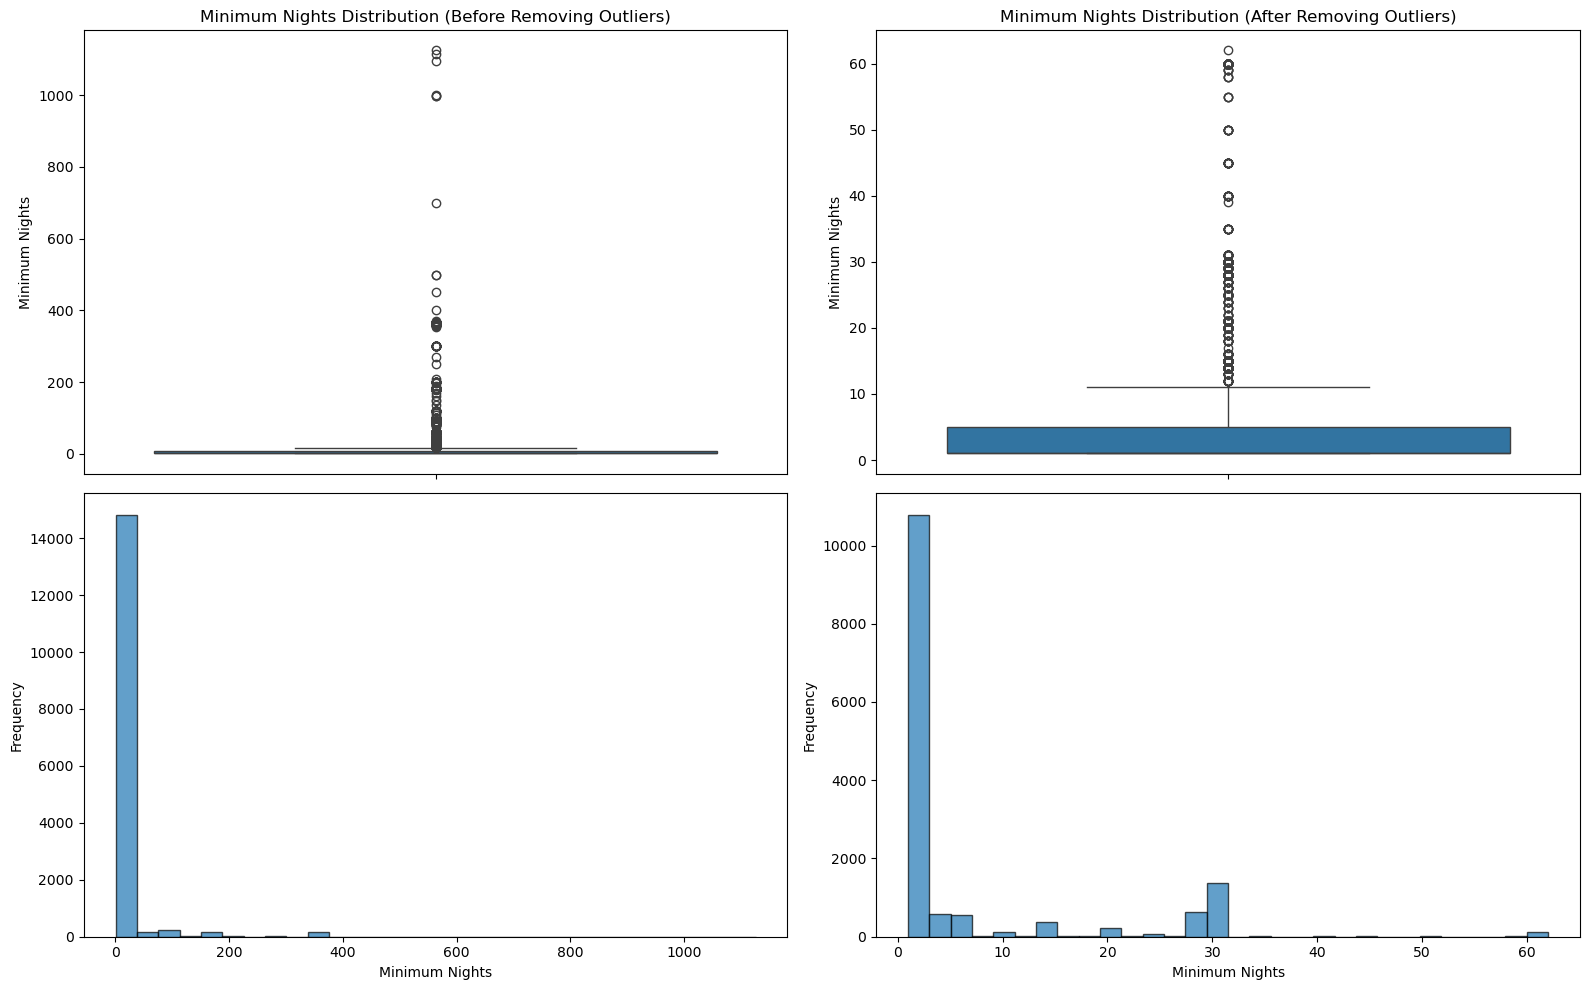

In [37]:
plt.figure(figsize=(16, 10))

# Boxplots
plt.subplot(2, 2, 1)
sns.boxplot(temp['minimum_nights'])
plt.title('Minimum Nights Distribution (Before Removing Outliers)')
plt.ylabel('Minimum Nights')

plt.subplot(2, 2, 2)
sns.boxplot(df['minimum_nights'])
plt.title('Minimum Nights Distribution (After Removing Outliers)')
plt.ylabel('Minimum Nights')

# Histograms
plt.subplot(2, 2, 3)
plt.hist(temp['minimum_nights'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['minimum_nights'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()


In [38]:
len(df)

14991

> - **Data berkurang sebanyak `800` dari jumlah `15791` menjadi `14991`**

In [39]:
starting_length = 15854
after_cleaning = 14991

percentage_dropped = str(round(((starting_length - after_cleaning) / starting_length), 3) * 100)
percentage_dropped = percentage_dropped + '%'

pd.DataFrame({'percentage_dropped': [percentage_dropped], 'data_shape': [df.shape]})

percentage_dropped   data_shape
0               5.4%  (14991, 19)

> - **Proses `data cleaning` mengurangi data sebanyak `5,4%` (15854 -> 14991)**
> - **Proses ini juga menambahkan 3 kolom baru dari 16 menjadi 19.**

In [40]:
# df.to_csv('airbnb_listings_cleaned.csv', index=False)

<h2 style='font-weight:bold;color:#c35347'>Data Visualization: <span style='color:#FFFFFF'>Distribusi Listing Airbnb di Berbagai Wilayah Bangkok</span></h2>

In [41]:
category_counts = df['area_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

category_summary = pd.DataFrame({
    'total_listings': category_counts,
    'percentage': category_percentages
})

category_summary = category_summary.reset_index()
category_summary = pd.DataFrame(category_summary).rename(columns={'index': 'area_category'})

category_summary

area_category  total_listings  percentage
0            Central Business District (CBD)            5777   38.536455
1                       Eastern Growth Areas            5469   36.481889
2                 Northern Residential Areas            2272   15.155760
3           Southern Business and Port Areas             820    5.469949
4  Western Traditional and Residential Areas             653    4.355947

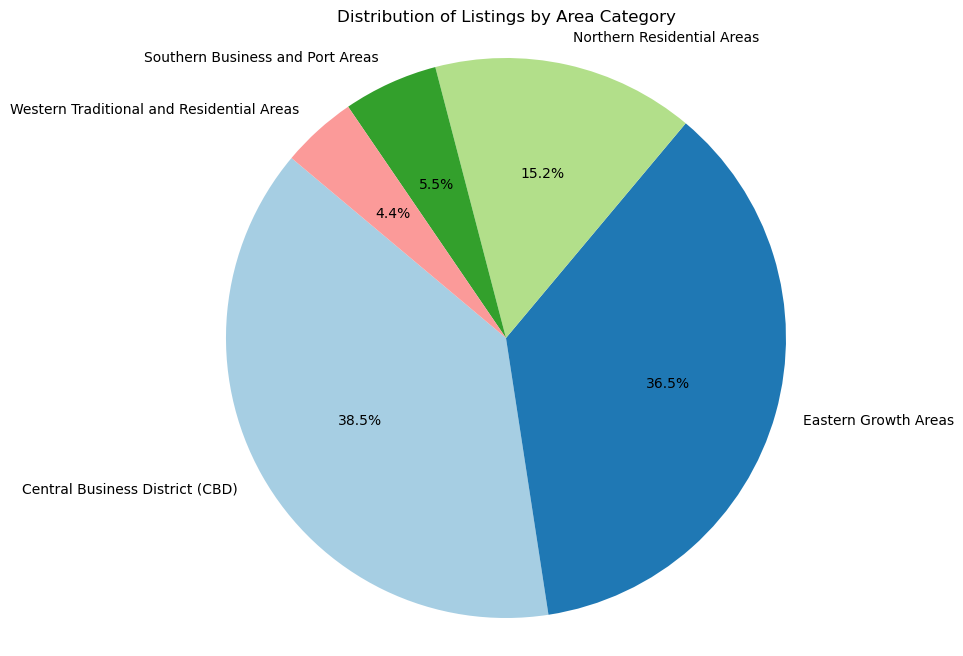

In [42]:
labels = category_summary['area_category']
sizes = category_summary['percentage']
colors = plt.cm.Paired(range(len(labels)))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Listings by Area Category')
plt.axis('equal')

plt.show()

> - **Proporsi listing di `Central Business District (CBD)` dan `Eastern Growth Areas` merupakan yang tertinggi, kemungkinan karena area ini merupakan pusat utama aktivitas bisnis dan wisata di Bangkok.**
> - **Sedangkan untuk `Southern Business and Port Areas` dan `Western Traditional and Residential Areas` masing-masing memiliki persentase `5,5%` dan `3,4%`, menandakan kurangnya distribusi listing pada area perindustrian dan tradisional.**

In [43]:
geojson_file = 'districts.geojson'
districts_geo = gpd.read_file(geojson_file)

data = {
    'neighbourhood': [
        'Vadhana', 'Khlong Toei', 'Huai Khwang', 'Ratchathewi', 'Bang Rak',
        'Sathon', 'Phra Nakhon', 'Phra Khanong', 'Chatuchak', 'Pathum Wan',
        'Din Daeng', 'Phaya Thai', 'Bang Na', 'Suanluang', 'Khlong San',
        'Bang Kapi', 'Bang Sue', 'Bang Phlat', 'Yan Nawa', 'Thon Buri',
        'Don Mueang', 'Prawet', 'Phasi Charoen', 'Bangkok Noi', 'Lat Krabang',
        'Lak Si', 'Pom Prap Sattru Phai', 'Bang Kho Laem', 'Samphanthawong', 'Bang Khen',
        'Wang Thonglang', 'Bang Khae', 'Bangkok Yai', 'Dusit', 'Chom Thong',
        'Min Buri', 'Lat Phrao', 'Khan Na Yao', 'Bueng Kum', 'Rat Burana',
        'Taling Chan', 'Saphan Sung', 'Sai Mai', 'Khlong Sam Wa', 'Thung Khru',
        'Bang Khun Thian', 'Nong Chok', 'Thawi Watthana', 'Nong Khaem', 'Bang Bon'
    ],
    'percentage': [
        13.63, 13.15, 7.10, 7.07, 5.25,
        5.10, 4.12, 3.44, 3.40, 2.82,
        2.75, 2.73, 2.71, 2.42, 2.17,
        1.65, 1.52, 1.31, 1.23, 1.13,
        1.09, 1.02, 0.99, 0.99, 0.96,
        0.82, 0.81, 0.81, 0.76, 0.73,
        0.64, 0.61, 0.59, 0.59, 0.45,
        0.41, 0.36, 0.35, 0.35, 0.33,
        0.33, 0.30, 0.26, 0.20, 0.15,
        0.13, 0.09, 0.08, 0.06, 0.03
    ]
}

df_map = pd.DataFrame(data)

In [44]:
bangkok_latlong = [13.7563, 100.5018]
map = folium.Map(location=bangkok_latlong, zoom_start=12)

folium.Choropleth(
    geo_data=districts_geo,
    data=df_map,
    columns=['neighbourhood', 'percentage'],
    key_on='feature.properties.dname_e',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    highlight=True,
    nan_fill_opacity=0.5,
    legend_name='Distribusi listing per Neighbourhood (%)',
).add_to(map)

area_label_coords = {
    'Central Business District (CBD)': [13.736717, 100.523186], 
    'Eastern Growth Areas': [13.718014, 100.604492], 
    'Northern Residential Areas': [13.827860, 100.568335],  
    'Southern Business and Port Areas': [13.695099, 100.530097],
    'Western Traditional and Residential Areas': [13.729386, 100.481483]
}

for area, coords in area_label_coords.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(
            html=f'<h2 style="font-size: 12px; font-weight: bold;">{area}</h2>',
            ),
    ).add_to(map)
    
    above_coords = (coords[0] + 0.005, coords[1])  
    folium.Marker(
        location=above_coords,
        icon=folium.Icon(icon="info-sign", color="blue"),
    ).add_to(map)

map


> - **Pada map chloropleth juga terlihat konsentrasi listing yang tinggi pada area sekitar `CBD` dan `Eastern Growth Areas`.**  
> - **Dapat diasumsikan wilayah dengan konsentrasi listing yang tinggi seperti di `CBD (Central Business District)` dan `Eastern Growth Areas` memiliki permintaan yang lebih tinggi terhadap akomodasi Airbnb.** 
> - **Hal ini mungkin disebabkan oleh kedekatannya dengan pusat kegiatan bisnis, perbelanjaan, dan area pertumbuhan yang menarik bagi wisatawan dan `business travelers`.**

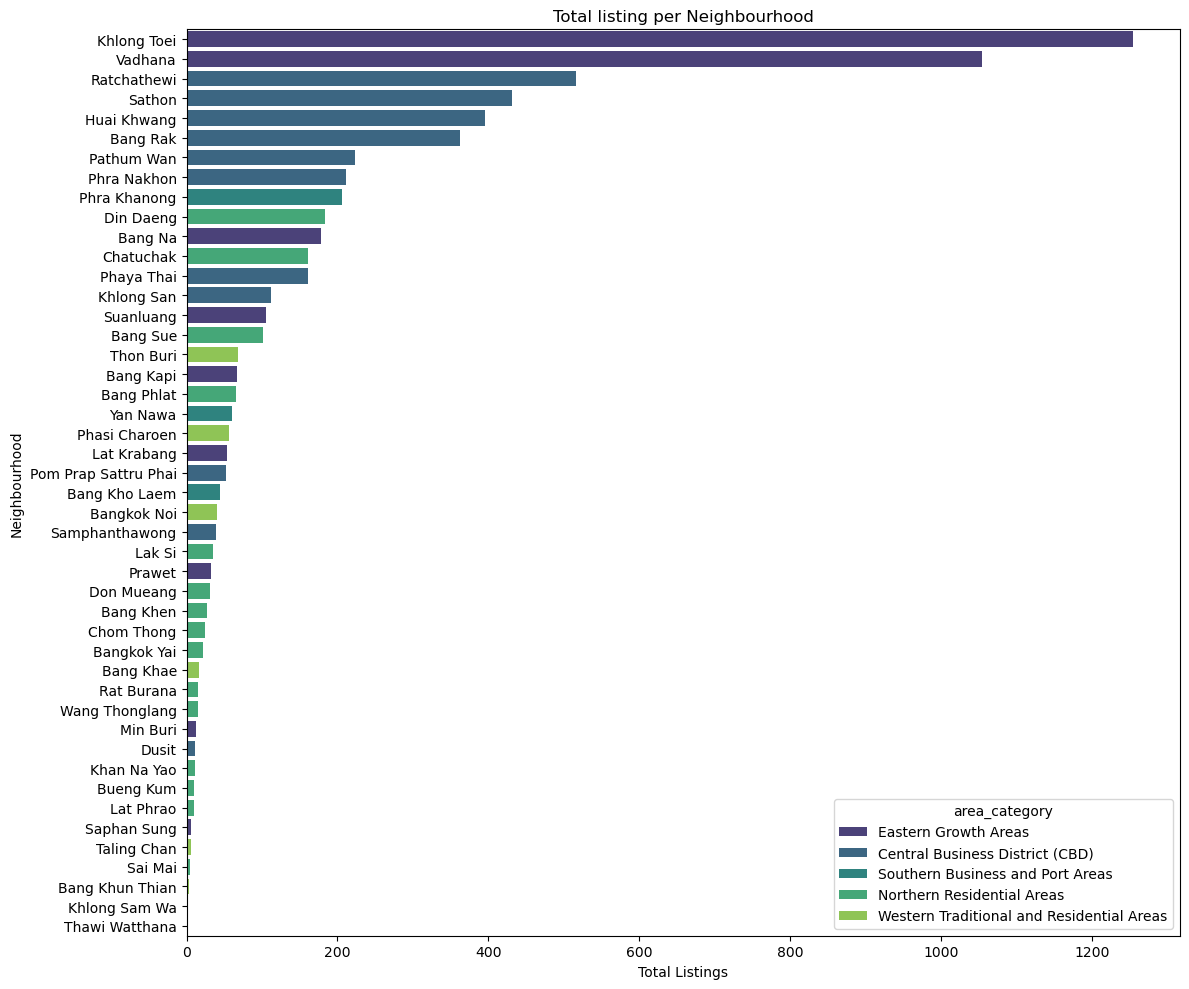

In [45]:
df_distribution = df.copy()
# Filter listing yang aktif (memiliki setidaknya 1 review 12 bulan terakhir)
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 0]

df_distribution = df_distribution[['area_category','neighbourhood']].value_counts().reset_index()
df_distribution_sorted = df_distribution.sort_values('count', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(data=df_distribution_sorted, y='neighbourhood', x='count', hue='area_category', palette='viridis')

# Add titles and labels
plt.title('Total listing per Neighbourhood')
plt.xlabel('Total Listings')
plt.ylabel('Neighbourhood')

# Adjust layout
plt.tight_layout()
plt.show()


In [46]:
df_distribution_sorted[:8]['count'].sum() / df_distribution_sorted['count'].sum()

0.6844697552716639

> - **Dapat dilihat bahwa distribusi `listing` tersebar mayoritas di daerah `Growth Eastern` seperti `Khlong Toei` dan `Vadhana`.**
> - **Dan juga pada daerah `CBD` seperti `Ratchathewi` dan `Sathon`.**
> - **Apakah jika jumlah listing tinggi menandakan bahwa demand juga tinggi pada wilayah tersebut?**

### Area Pertumbuhan Tinggi

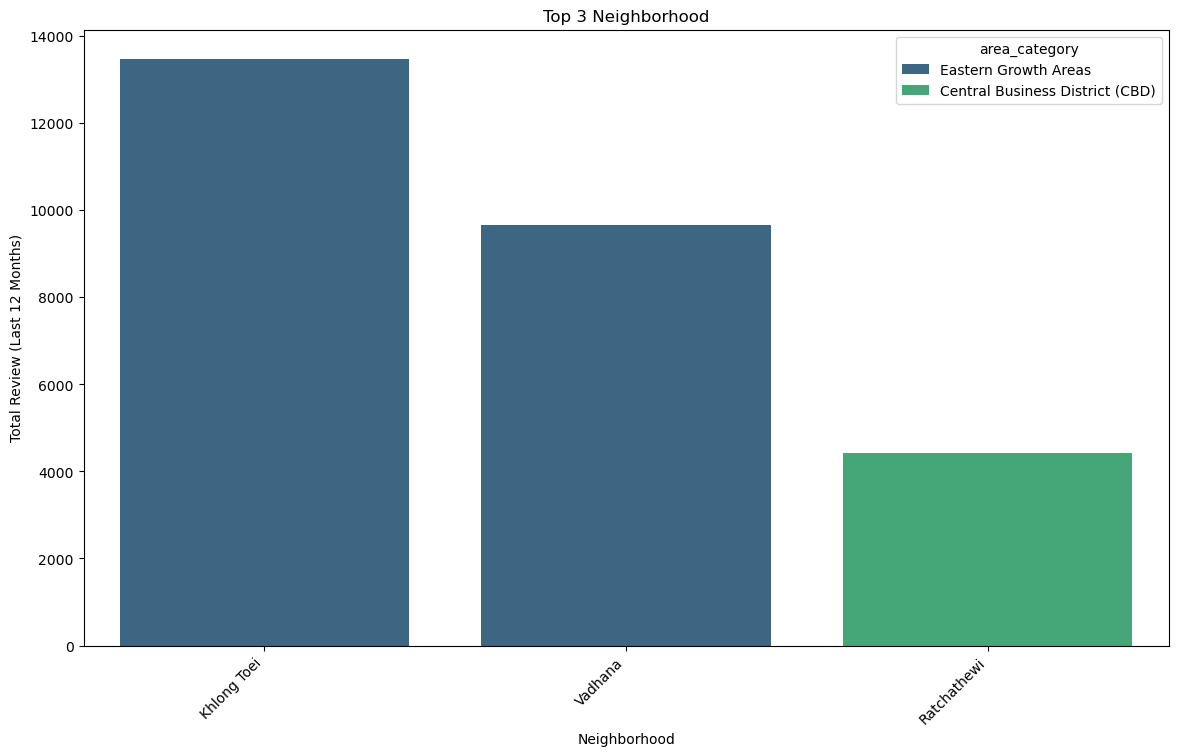

In [47]:
df_distribution = df.copy()

# Filter listing yang aktif (memiliki setidaknya 1 review 12 bulan terakhir)
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 0]

# Menampilkan area dengan jumlah review satu tahun terakhir yang terbesar
df_distribution = df_distribution.groupby(['area_category','neighbourhood'])['number_of_reviews_ltm'].sum().reset_index()
df_distribution_sorted = df_distribution.sort_values('number_of_reviews_ltm', ascending=False).head(3)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_distribution_sorted, x='neighbourhood', y='number_of_reviews_ltm', hue='area_category', palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Top 3 Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Review (Last 12 Months)')

plt.show()

> - **Terbukti bahwa `semakin banyak listing pada suatu area`, berarti `demand pada area tersebut juga tinggi`. Hal ini dapat dilihat dari total review satu tahun terakhir setiap wilayah.**  
> - **`Khlong Toei` merupakan kawasan yang terletak di pusat Bangkok, dekat dengan berbagai pusat bisnis dan fasilitas umum seperti pelabuhan dan pasar (`Khlong Toei Market`) dan transportasi sepeti stasiun MRT.**  
> - **`Vadhana` adalah kawasan yang dikenal dengan suasana `modern` dan `trendi` karena menawarkan kehidupan malam yang aktif, dengan banyak `bar` dan `klub`.** 
> - **`Ratchathewi` terletak dekat dengan beberapa pusat perbelanjaan besar, seperti `MBK Center` dan `Siam Paragon`, yang membuatnya menjadi lokasi populer di kalangan pembeli dan wisatawan.**

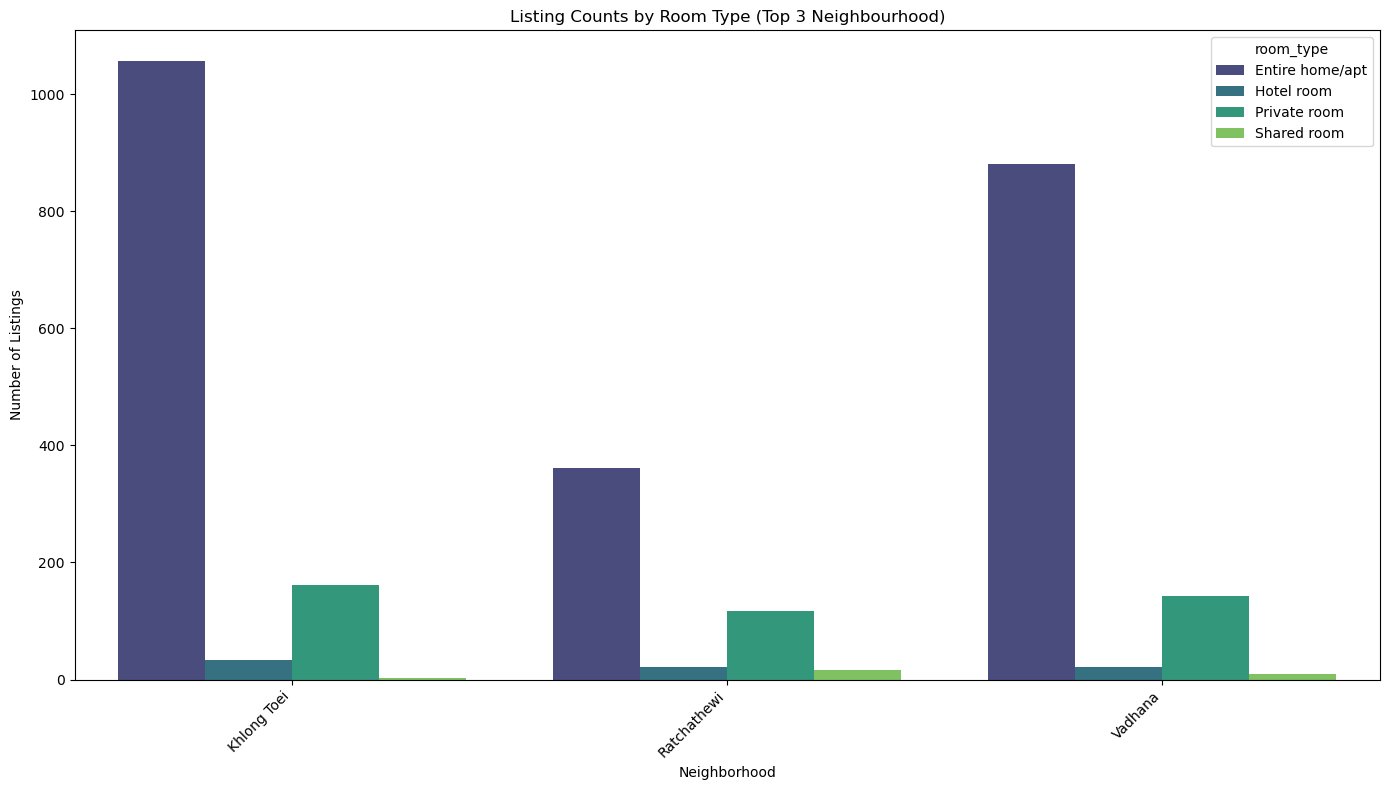

In [48]:
df_distribution = df.copy()

# Filter listing yang aktif (memiliki setidaknya 1 review 12 bulan terakhir)
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 0]

selected_neighborhoods = ['Khlong Toei', 'Vadhana', 'Ratchathewi']
df_distribution = df_distribution[df_distribution['neighbourhood'].isin(selected_neighborhoods)]

room_type_counts = df_distribution.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(data=room_type_counts, x='neighbourhood', y='count', hue='room_type', palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Listing Counts by Room Type (Top 3 Neighbourhood)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')

# Adjust layout
plt.tight_layout()
plt.show()

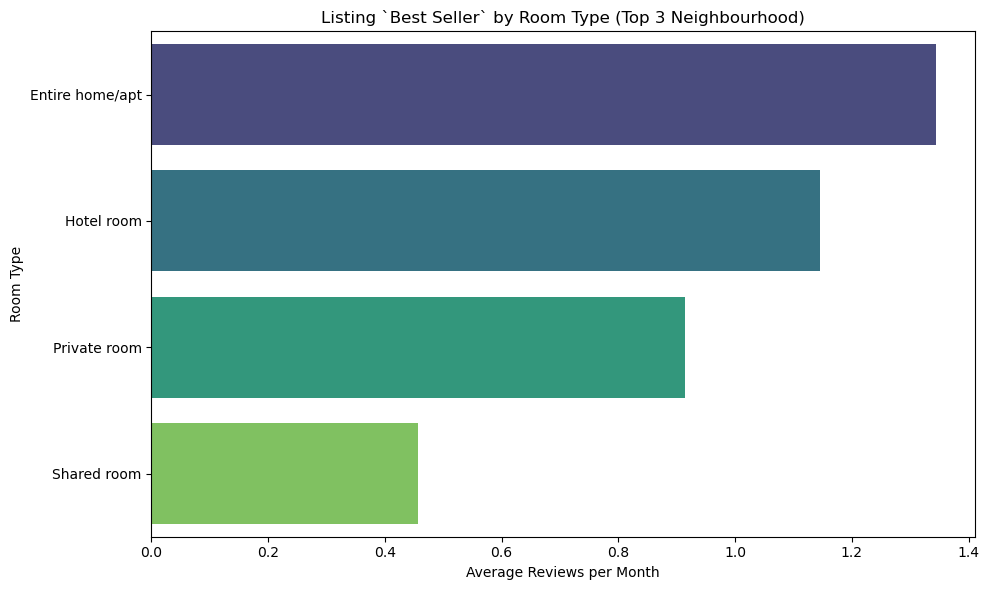

In [49]:
df_distribution_reviews_per_month = df_distribution.groupby('room_type')['reviews_per_month'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_distribution_reviews_per_month, x='reviews_per_month', y='room_type', palette='viridis')

# Add titles and labels
plt.title('Listing `Best Seller` by Room Type (Top 3 Neighbourhood)')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Room Type')

# Adjust layout
plt.tight_layout()
plt.show()


> - **Dari ketiga `neighbourhood` paling populer, tipe penginapan yang memiliki review bulanan tertinggi dan konsisten merupakan tipe `rumah` atau `apartemen` diikuti oleh `hotel room`**
> - **Dapat diasumsikan bahwa pengunjung lebih sering membawa `keluarga` (membutuhkan `space yang besar`) ketika mengunjungi daerah-daerah ini**

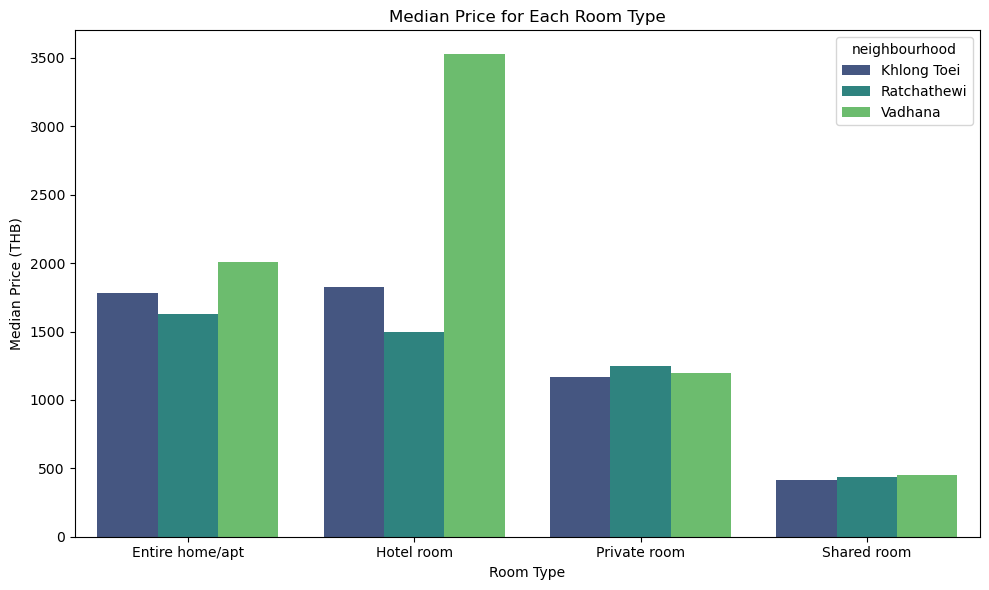

In [50]:
df_distribution_median_prices = df_distribution.groupby(['neighbourhood', 'room_type'])['price'].median().reset_index().sort_values('price')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_distribution_median_prices, x='room_type', y='price', hue='neighbourhood', palette='viridis')

plt.title('Median Price for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Price (THB)')

plt.tight_layout()
plt.show()

In [51]:
df_distribution_reviews_per_month = df_distribution.groupby('room_type')['reviews_per_month'].mean().reset_index()
df_distribution_median_prices = df_distribution_median_prices.groupby('room_type')['price'].mean().reset_index()

df_distribution_median_prices.merge(df_distribution_reviews_per_month).rename(columns={'reviews_per_month': 'average_reviews_per_month', 'price': 'average_price'})

room_type  average_price  average_reviews_per_month
0  Entire home/apt    1805.166667                   1.343483
1       Hotel room    2281.500000                   1.144872
2     Private room    1206.333333                   0.914810
3      Shared room     432.666667                   0.457586

> - **Dari ketiga wilayah, semua tipe listing relatif memiliki harga yang serupa kecuali harga hotel pada daerah Vadhana**
> - **Harga `hotel` dan `rumah/apartemen` terkesan serupa untuk ketiga wilayah**
> - **Income `harian` yang dapat dicapai oleh properti ini sekitar Rp. 819,623 untuk tipe `rumah/apartemen` dan sekitar Rp. 1,035,768 untuk tipe `hotel`**

#### Anomali Harga Hotel pada wilayah Vadhana

In [52]:
temp = df_distribution.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()
temp2 = df_distribution[(df_distribution['neighbourhood'] == 'Vadhana') & (df_distribution['room_type'] == 'Hotel room')]

# Price hotel diatas Q3 pada neighbourhood Vadhana
display(temp[temp['room_type'] == 'Hotel room'].sort_values('price'), temp2[temp2['price']>6000])

neighbourhood   room_type        price
5   Ratchathewi  Hotel room  1740.181818
1   Khlong Toei  Hotel room  2095.441176
9       Vadhana  Hotel room  3968.409091

id                                               name    host_id  \
5789  28706335      YOLO Bangkok  Hotel IB&BI BTS-MRT-Boat l LOFT   18234321   
6190  29774689       New!YOLO Bkk Hotel IB&BI BTS-MRT-Boat l LOFT   18234321   
6568  30914892  ☆3 Bedrooms Penthouse, big living ☆ Muji inspired  216709072   
7795  34689872             Bangkok Shortstay, 3 bedroom apartment  261682047   
8514  37106117        Modern Design between Asoke and Phrom Phong  186195358   
8528  37134868    Luxurious Room with Modern Bathtub close to BTS  186195358   

                        host_name neighbourhood   latitude   longitude  \
5789                          Yue       Vadhana  13.746230  100.559750   
6190                          Yue       Vadhana  13.746140  100.559860   
6568                        Nimit       Vadhana  13.734450  100.568050   
7795            Bangkok Shortstay       Vadhana  13.736930  100.570500   
8514  The Continent Hotel Bangkok       Vadhana  13.736386  100.562057   
8528  The Continent Hotel Bangkok       Vadhana  13.736386  100.562057   

       room_type  price  minimum_nights  number_of_reviews last_review  \
5789  Hotel room   6529               1                 22  2022-10-23   
6190  Hotel room   6374               1                 30  2022-09-28   
6568  Hotel room   8283               1                131  2022-12-11   
7795  Hotel room   8839               1                  5  2022-12-09   
8514  Hotel room   7413               1                  1  2022-09-18   
8528  Hotel room   7713               1                  4  2022-04-16   

      reviews_per_month  calculated_host_listings_count  availability_365  \
5789               0.44                              13               347   
6190               0.60                              13               342   
6568               2.67                               5               329   
7795               0.87                               2                85   
8514               0.29                               5               363   
8528               0.11                               5               362   

      number_of_reviews_ltm         area_category review_month  \
5789                      6  Eastern Growth Areas      October   
6190                      1  Eastern Growth Areas    September   
6568                     33  Eastern Growth Areas     December   
7795                      5  Eastern Growth Areas     December   
8514                      1  Eastern Growth Areas    September   
8528                      2  Eastern Growth Areas        April   

      estimated_starting_year  
5789                     2018  
6190                     2018  
6568                     2018  
7795                     2022  
8514                     2022  
8528                     2019

> - **Distribusi hotel pada neighbourhood `Vadhana` sebelumnya bukanlah sebuah anomali, melainkan memang terdapat beberapa `luxury hotels / penthouses` (aktif listing) yang dipasarkan dengan harga sangat tinggi.**

### Area Kurang Berkembang

In [53]:
df_distribution = df.copy()

# Filter listing yang aktif (memiliki setidaknya 1 review 12 bulan terakhir)
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 0]

# Menampilkan area dengan jumlah review satu tahun terakhir yang terbesar
df_distribution = df_distribution.groupby(['area_category','neighbourhood'])['number_of_reviews_ltm'].sum().reset_index()
df_distribution.describe()

number_of_reviews_ltm
count              46.000000
mean             1187.239130
std              2486.693165
min                 1.000000
25%                49.500000
50%               259.000000
75%              1106.000000
max             13473.000000

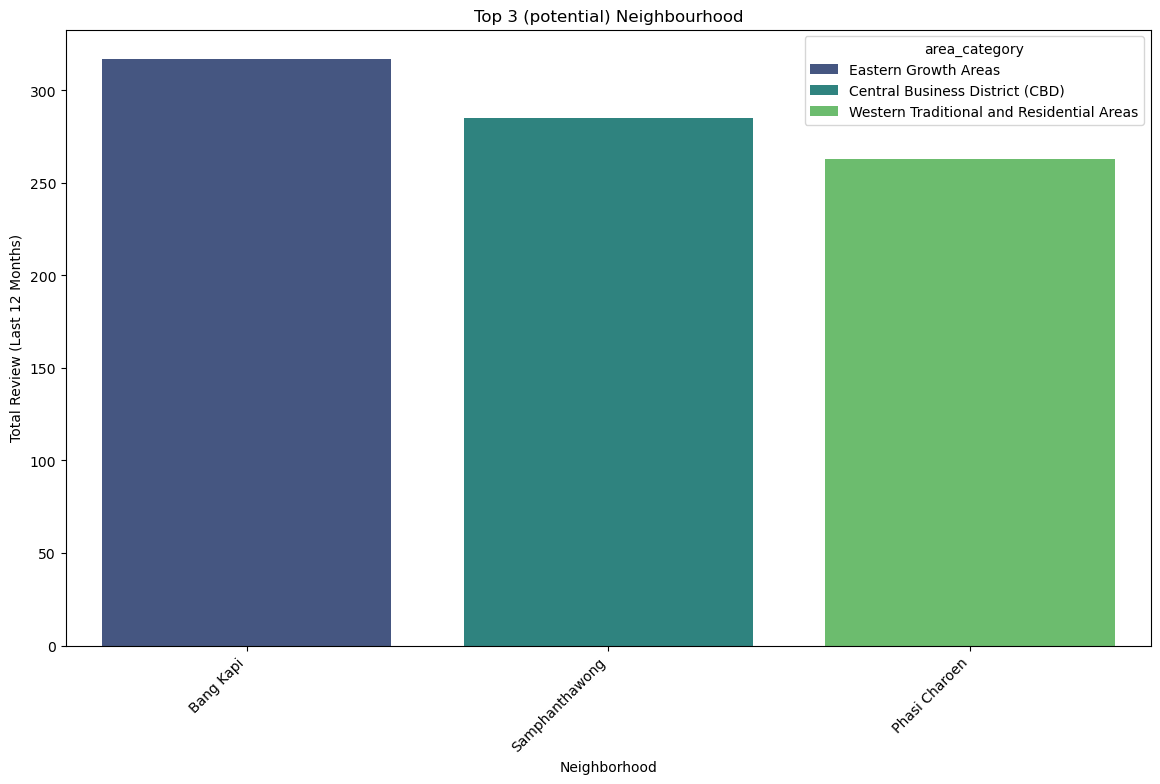

In [54]:
# Mengambil data listing dengan jumlah review satu tahun terakhir yang lebih dari 50% sebaran data
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 259]

# Mengambil bottom 3 dari data tersebut, untuk mendapatkan wilayah yang kurang berkembang tetapi berpotensi
df_distribution_sorted = df_distribution.sort_values('number_of_reviews_ltm', ascending=False).tail(3)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_distribution_sorted, x='neighbourhood', y='number_of_reviews_ltm', hue='area_category', palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Top 3 (potential) Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Review (Last 12 Months)')

plt.show()

- **Ketiga wilayah ini dapat dinyatakan `kurang berkembang` karena jumlah review dari setiap listing dalam `satu tahun terakhir relatif rendah`. Tetapi memiliki `potensial karena masih berada diata 50%` sebaran data.**  
- **`Bang Kapi` adalah area residensial yang memiliki potensi besar untuk berkembang sebagai destinasi penginapan karena terletak di dekat beberapa `universitas` dan `pusat perbelanjaan`. `Bang Kapi` juga merupakan daerah yang sering diadakan konser besar dan merupakan daerah kandang untuk `tim bola Thailand`**  
- **`Samphanthawong` adalah kawasan dekat dengan semi-`CBD` yang kaya akan budaya dan sejarah, terutama dengan Chinatown sebagai daya tarik utamanya. Daerah ini juga dapat menarik banyak pengunjung yang tertarik dengan `pengalaman budaya yang autentik` dan kuliner lokal.**
- **`Phasi Charoen` merupakan kawasan tradisional/residensial yang memiliki potensi perkembangan, terutama dengan rencana pengembangan infrastruktur transportasi, seperti `perluasan jalur BTS`.**  

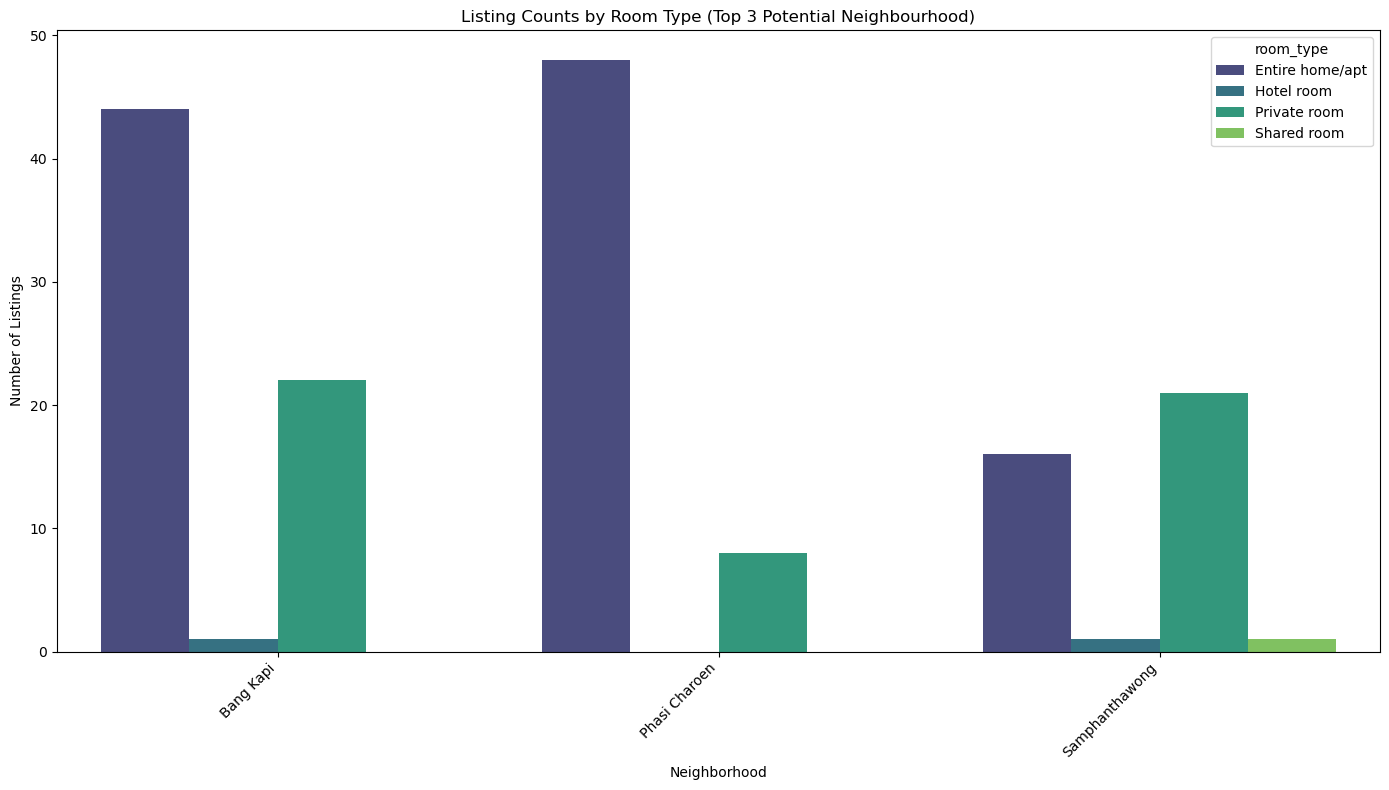

In [55]:
df_distribution = df.copy()

# Filter listing yang aktif (memiliki setidaknya 1 review 12 bulan terakhir)
df_distribution = df_distribution[df_distribution['number_of_reviews_ltm'] > 0]

selected_neighborhoods = ['Bang Kapi', 'Samphanthawong', 'Phasi Charoen']
df_distribution = df_distribution[df_distribution['neighbourhood'].isin(selected_neighborhoods)]

room_type_counts = df_distribution.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(data=room_type_counts, x='neighbourhood', y='count', hue='room_type', palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Listing Counts by Room Type (Top 3 Potential Neighbourhood)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')

# Adjust layout
plt.tight_layout()
plt.show()

> - **Dari ketiga `neighbourhood`, tipe penginapan yang memiliki listing terbanyak merupakan tipe `rumah` atau `apartemen` diikuti oleh `private room`**
> - **`Bang Kapi`, sebagai area residensial yang lebih tenang, Bang Kapi lebih cocok untuk tipe akomodasi rumah dan apartemen yang biasanya menawarkan privasi dan kenyamanan lebih besar.**
> - **`Samphanthawong` memiliki lokasi yang strategis di pusat kota, dan dapat diasumsikan bisa menarik wisatawan atau `pekerja` yang membutuhkan `akomodasi praktis` dan terjangkau di `tengah kota`.**
> - **`Phasi Charoen` yang merupakan area residensial tradisional, wajar memiliki listing populer dengan tipe rumah, karena kemungkinan kurangnya atraksi komersil/bisnis pada wilayah tersebut sehingga properti hotel juga sedikit.**

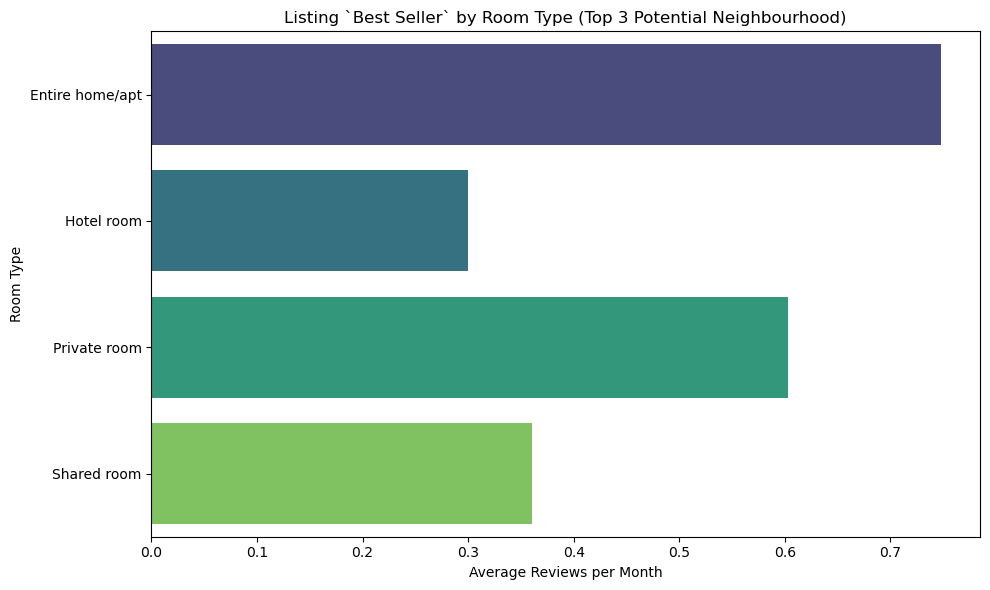

In [56]:
df_distribution_reviews_per_month = df_distribution.groupby('room_type')['reviews_per_month'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_distribution_reviews_per_month, x='reviews_per_month', y='room_type', palette='viridis')

# Add titles and labels
plt.title('Listing `Best Seller` by Room Type (Top 3 Potential Neighbourhood)')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Room Type')

# Adjust layout
plt.tight_layout()
plt.show()


> - **Dari ketiga `neighbourhood` yang berpotensi, tipe penginapan yang memiliki review bulanan tertinggi dan konsisten merupakan tipe `rumah/apartemen` diikuti oleh `private room`.**
> - **Performa tinggi tipe `rumah/apartemen` dapat diasumsikan mendapatkan kontribusi terbesar dari daerah residensial seperti `Bang Kapi` dan `Phasi Charoen`**
> - **Sementara untuk performa tinggi tipe `private/shared rooms` dapat diasumsikan mendapatkan kontribusi terbesar dari daerah `CBD` seperti `Samphanthawong`**

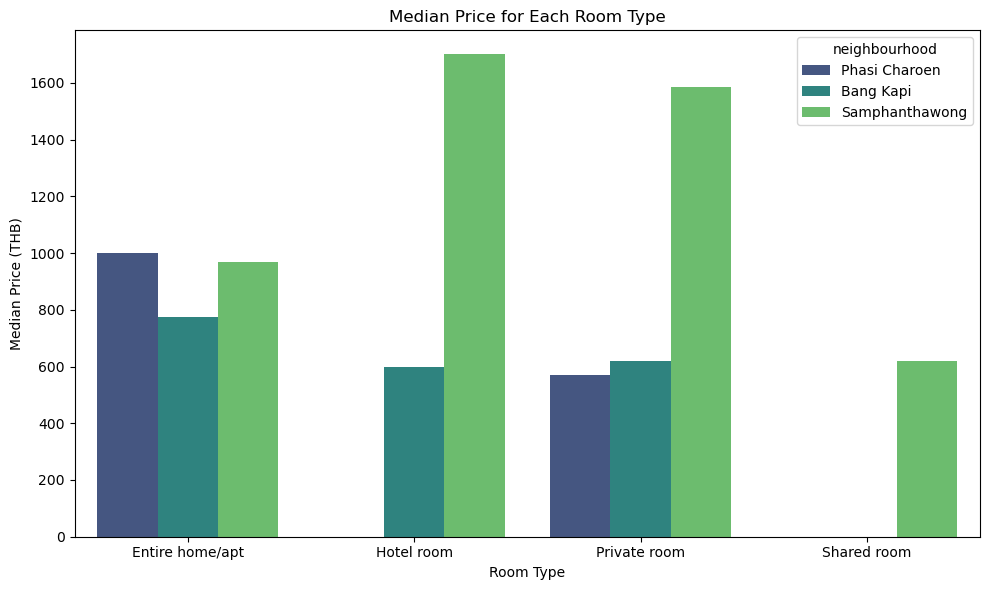

In [57]:
df_distribution_median_prices = df_distribution.groupby(['neighbourhood', 'room_type'])['price'].median().reset_index().sort_values('price')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_distribution_median_prices, x='room_type', y='price', hue='neighbourhood', palette='viridis')

plt.title('Median Price for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Price (THB)')

plt.tight_layout()
plt.show()

In [58]:
df_distribution_reviews_per_month = df_distribution.groupby('room_type')['reviews_per_month'].mean().reset_index()
df_distribution_median_prices = df_distribution_median_prices.groupby('room_type')['price'].mean().reset_index()

df_distribution_median_prices.merge(df_distribution_reviews_per_month).rename(columns={'reviews_per_month': 'average_reviews_per_month', 'price': 'average_price'}).sort_values('average_reviews_per_month', ascending=False)

room_type  average_price  average_reviews_per_month
0  Entire home/apt     914.500000                   0.747407
2     Private room     924.666667                   0.603333
3      Shared room     620.000000                   0.360000
1       Hotel room    1150.000000                   0.300000

> - **Daerah `Phasi Charoen` tidak memiliki listing hotel (yang aktif) dan hanya ada satu wilayah dari ketiga ini yang memiliki active listing untuk tipe `shared rooms`**
> - **Income `harian` yang dapat dicapai oleh properti ini sekitar Rp. 415,662 untuk tipe `rumah/apartemen` dan sekitar Rp. 420,283 untuk tipe `private_rooms`**
> - **Dapat dilihat juga bahwa `harga` listing pada area-area ini `jauh dibawah` area dengan perkembangan tinggi pada analisis sebelumnya**
> - **Dapat diasumsikan harga properti `Samphanthawong` yang tinggi diakibatkan lokasi-nya yang merupakan `CBD`**

## Insights

> - **`Area Dengan Pertumbuhan Tinggi` -> [`Khlong Toei`, `Vadhana`, `Ratchathewi`]** 
> - **`Area Dengan Potensi` -> [`Bang Kapi`, `Samphanthawong`, `Phasi Charoen`]** 

> - **Distribusi listing didominasi oleh area `CBD` dan `Eastern Growth Areas`**
> - **Properti seperti `rumah/apartemen` dan `hotel` memiliki performa tertinggi pada "Area Dengan Pertumbuhan Tinggi"**
> - **Properti seperti `rumah/apartemen` dan `private_rooms`  memiliki performa tertinggi pada "Area Berpotensial"**
> - **Semakin `berkembang suatu wilayah` (dapat dilihat dari `jumlah review satu tahun terakhir`), maka `harga` juga akan relatif meningkat.**
> - **Secara keseluruhan, `harga` properti listing harian pada area-area potensial lumayan `jauh dibawah` area dengan perkembangan tinggi**

<h2 style='font-weight:bold;color:#c35347'>Data Visualization: <span style='color:#FFFFFF'>Periode Puncak Pemesanan Listing </span></h2>

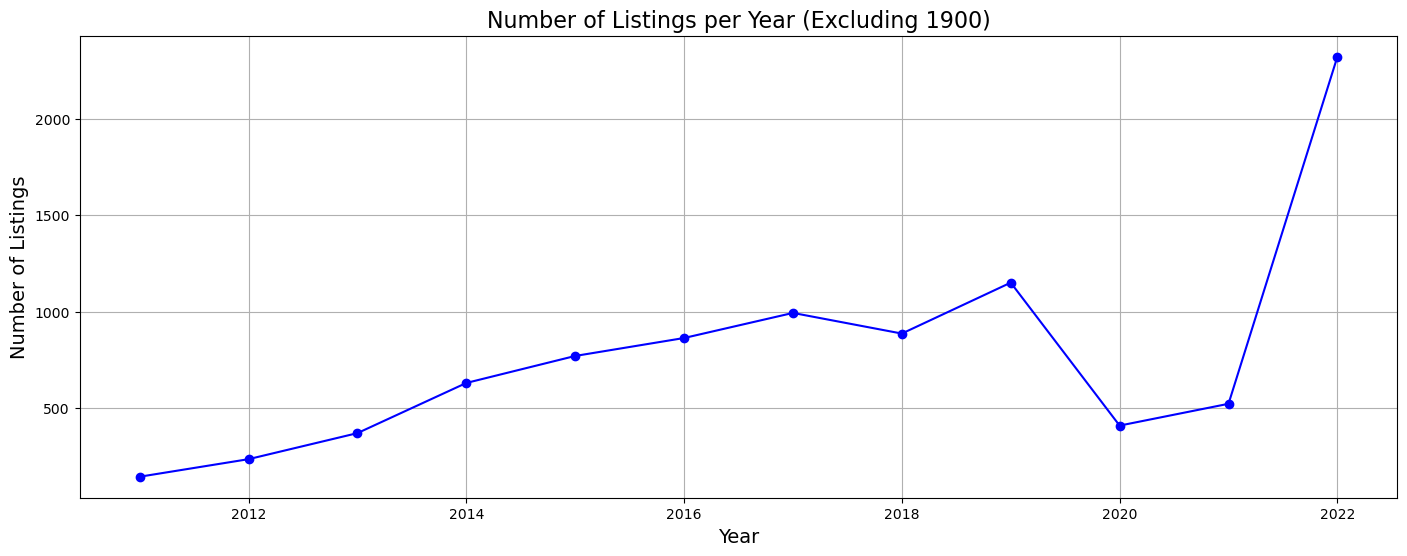

In [59]:
# Filter out the year 1900
df_filtered = df[(df['estimated_starting_year'] != 1900) & (df['estimated_starting_year'] >= 2011)]

yearly_listings = df_filtered.groupby(['estimated_starting_year']).size()

plt.figure(figsize=(17, 6))
plt.plot(yearly_listings.index, yearly_listings.values, marker='o', linestyle='-', color='b')

plt.title('Number of Listings per Year (Excluding 1900)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.grid(True)
plt.show()


> - **Mulai dari tahun `2015`, berdasarkan riset paper, Airbnb bangkok mengalami `annual average increase` sebanyak `34%` sampai tahun 2019**
> - **Lalu mengalami penurunan drastis pada tahun `2020` karena pandemi, dan melonjak lagi pada tahun `2022` karena perjalanan internasional sudah mulai ramai lagi.**
> - **Riset: https://www.researchgate.net/figure/Number-of-rental-households-and-Airbnb-in-Bangkok-by-district-2019_tbl3_365855094**

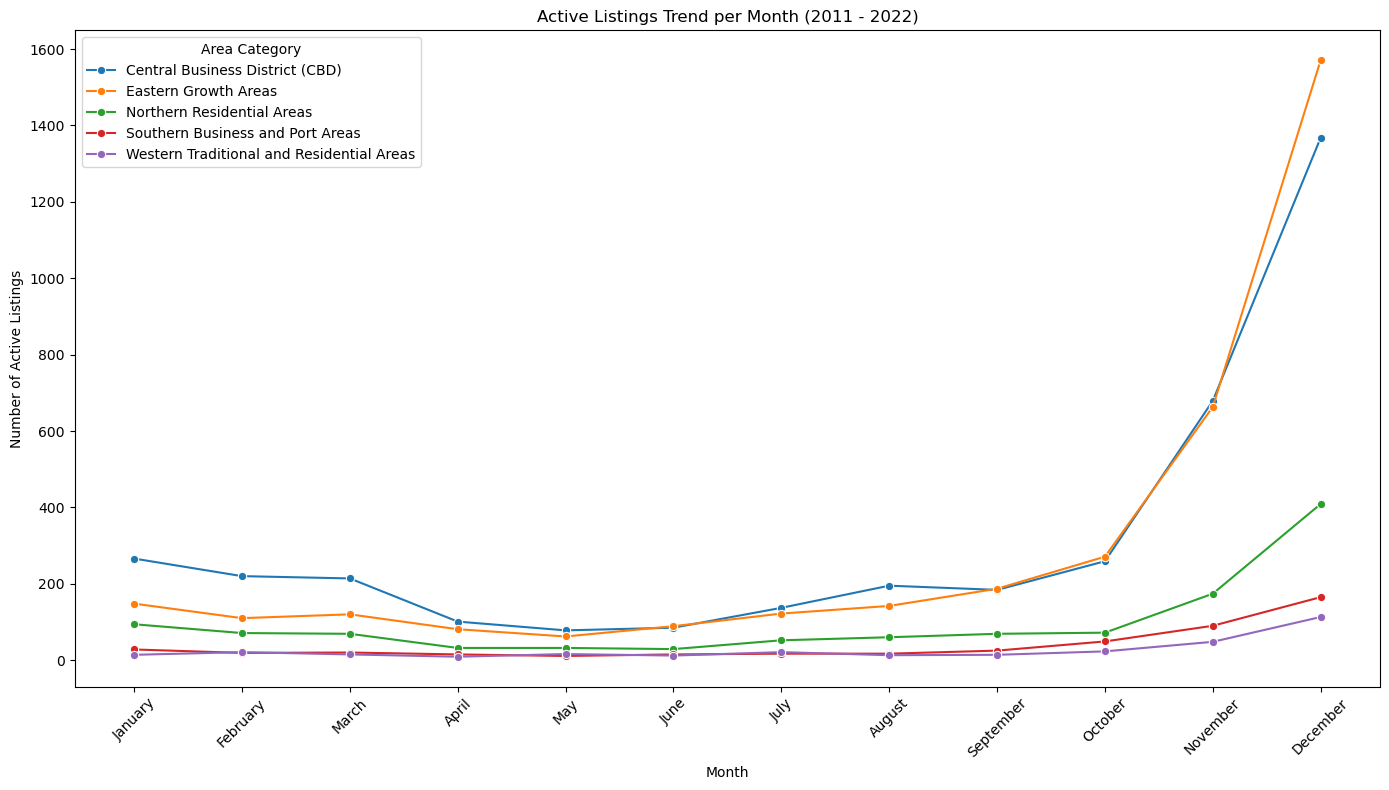

In [60]:
df_filtered = df[(df['estimated_starting_year'] != 1900) & (df['estimated_starting_year'] >= 2011)]

monthly_counts = df_filtered.groupby(['area_category', 'review_month']).size().reset_index(name='count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['review_month'] = pd.Categorical(monthly_counts['review_month'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values(['area_category', 'review_month'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_counts, x='review_month', y='count', hue='area_category', marker='o')

plt.title('Active Listings Trend per Month (2011 - 2022)')
plt.xlabel('Month')
plt.ylabel('Number of Active Listings')
plt.legend(title='Area Category')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> - **Untuk setiap area, dapat dikatakan memiliki trend yang sama yaitu peningkatan pemesanan listing diakhir tahun. Hal ini mungkin terkait dengan musim liburan dan cuti panjang yang membuat banyak orang melakukan perjalanan, meningkatkan permintaan akan akomodasi.**
> - **Bulan `January` sampai `July` dapat dikatakan tidak mengalami peningkatakan signifikan. Sementara mulai dari `Agustus` sampai akhir tahun mengalami lonjakan yang tinggi.**
> - **Bulan `April` sampai `July` merupakan bulan dengan tingkat pemesanan paling sedikit dibandingkan yang lain**
> - **Area Central Business District (CBD) mengalami lonjakan pemesanan yang signifikan pada bulan Agustus. Lonjakan ini bisa disebabkan oleh berbagai acara, konferensi, atau festival. Tetapi berdasarkan beberapa artikel, bulan agustus merupakan periode yang pas karena terdapat cuaca terbaik, serta beberapa `cultural events`**
> - **Sementara itu, mulai dari bulan September, area `Eastern Growth Areas` mulai melebihi `CBD` dalam hal jumlah pemesanan. Dapat diasumsikan para pemilik bisnis di area tersebut mulai sibuk untuk menyambut ramainya akhir tahun.**
> - **Artikel: https://pickyourtrail.com/bangkok-in-august & https://www.livemint.com/sponsored-post/heres-why-you-should-visit-bangkok-in-august-11722250420542.html**

### Bulan Dengan Demand Tinggi

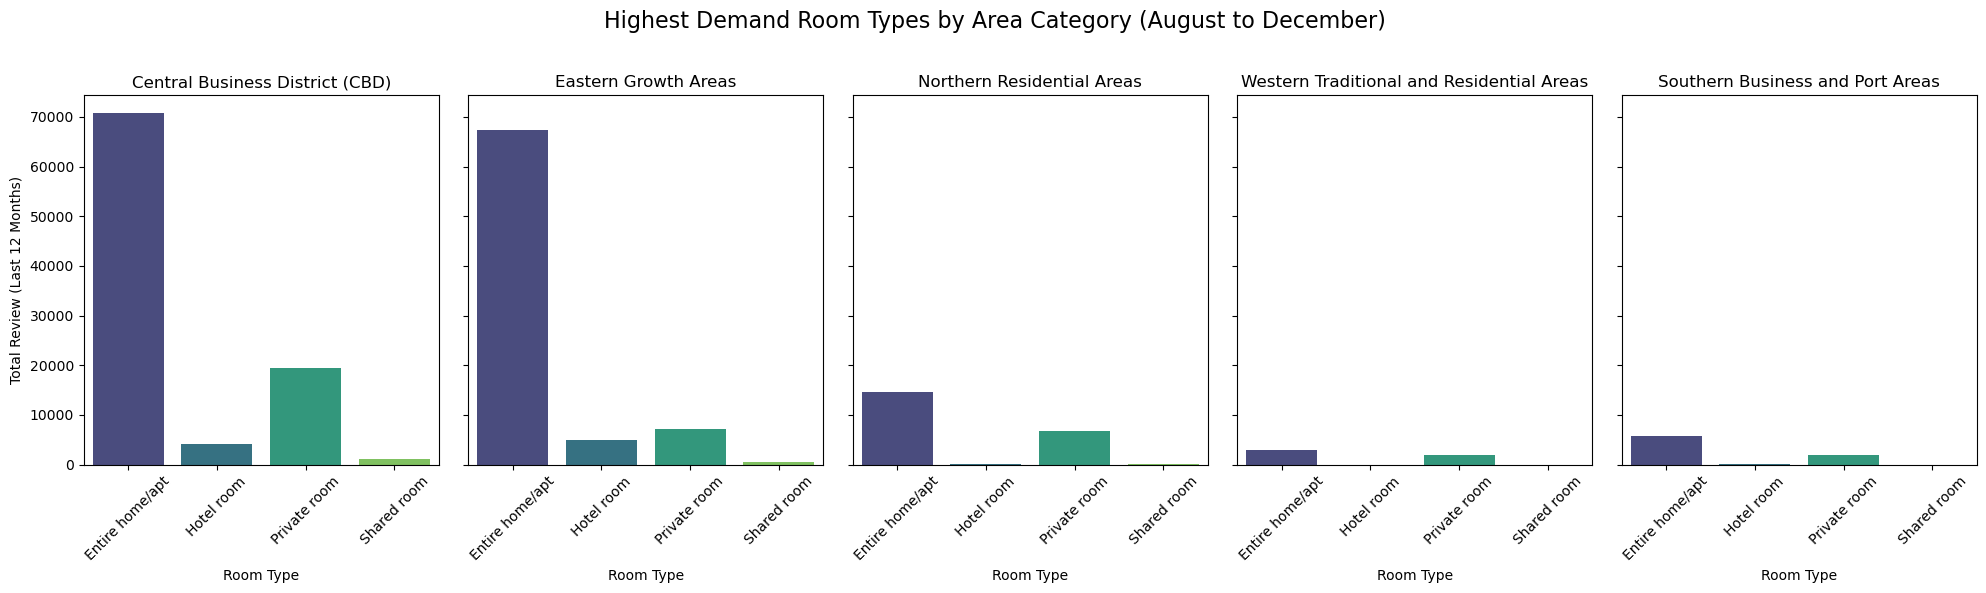

In [61]:
df_filtered = df.copy()

area_categories = df_filtered['area_category'].unique()

target_months = ['August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(nrows=1, ncols=len(area_categories), figsize=(20, 6), sharey=True)
fig.suptitle('Highest Demand Room Types by Area Category (August to December)', fontsize=16)

for ax, area in zip(axes, area_categories):
    filtered_data = df_filtered[(df_filtered['area_category'] == area) & (df_filtered['review_month'].isin(target_months)) & (df_filtered['estimated_starting_year'] != 1900)]
    
    room_type_counts = filtered_data.groupby('room_type')['number_of_reviews'].sum().reset_index()
    room_type_counts.columns = ['room_type', 'number_of_reviews']
    
    sns.barplot(data=room_type_counts, x='room_type', y='number_of_reviews', palette='viridis', ax=ax)
    
    ax.set_title(area)
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Total Review (Last 12 Months)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [62]:
target_months = ['August', 'September', 'October', 'November', 'December']
filtered_data = df[(df['review_month'].isin(target_months)) & (df['estimated_starting_year'] != 1900)]

temp = filtered_data.groupby(['room_type'])['number_of_reviews'].sum().reset_index()
temp

room_type  number_of_reviews
0  Entire home/apt             161490
1       Hotel room               9260
2     Private room              37287
3      Shared room               1624

> - **`Permintaan Akomodasi yang Lebih Besar`: Selama periode Agustus hingga Desember, terdapat peningkatan aktivitas liburan dan perjalanan, termasuk liburan panjang akhir tahun, perayaan musim, dan acara khusus. `House/apt` menawarkan lebih banyak ruang dan privasi, yang sering kali menjadi pilihan favorit bagi keluarga.**
> - **`Kenyamanan dan Fasilitas`: `House/apt` biasanya menyediakan fasilitas tambahan seperti dapur, ruang tamu, dan area luar yang memberikan kenyamanan tambahan untuk tamu yang berlibur dalam jangka waktu yang lebih lama.**
> - **`Harga dan Nilai`: Meskipun harga `house/apt` mungkin lebih tinggi dibandingkan `private_rooms`, periode akhir tahun biasanya adalah waktu ketika orang lebih bersedia untuk mengeluarkan anggaran tambahan untuk akomodasi yang lebih nyaman.**

### Bulan Dengan Demand Rendah

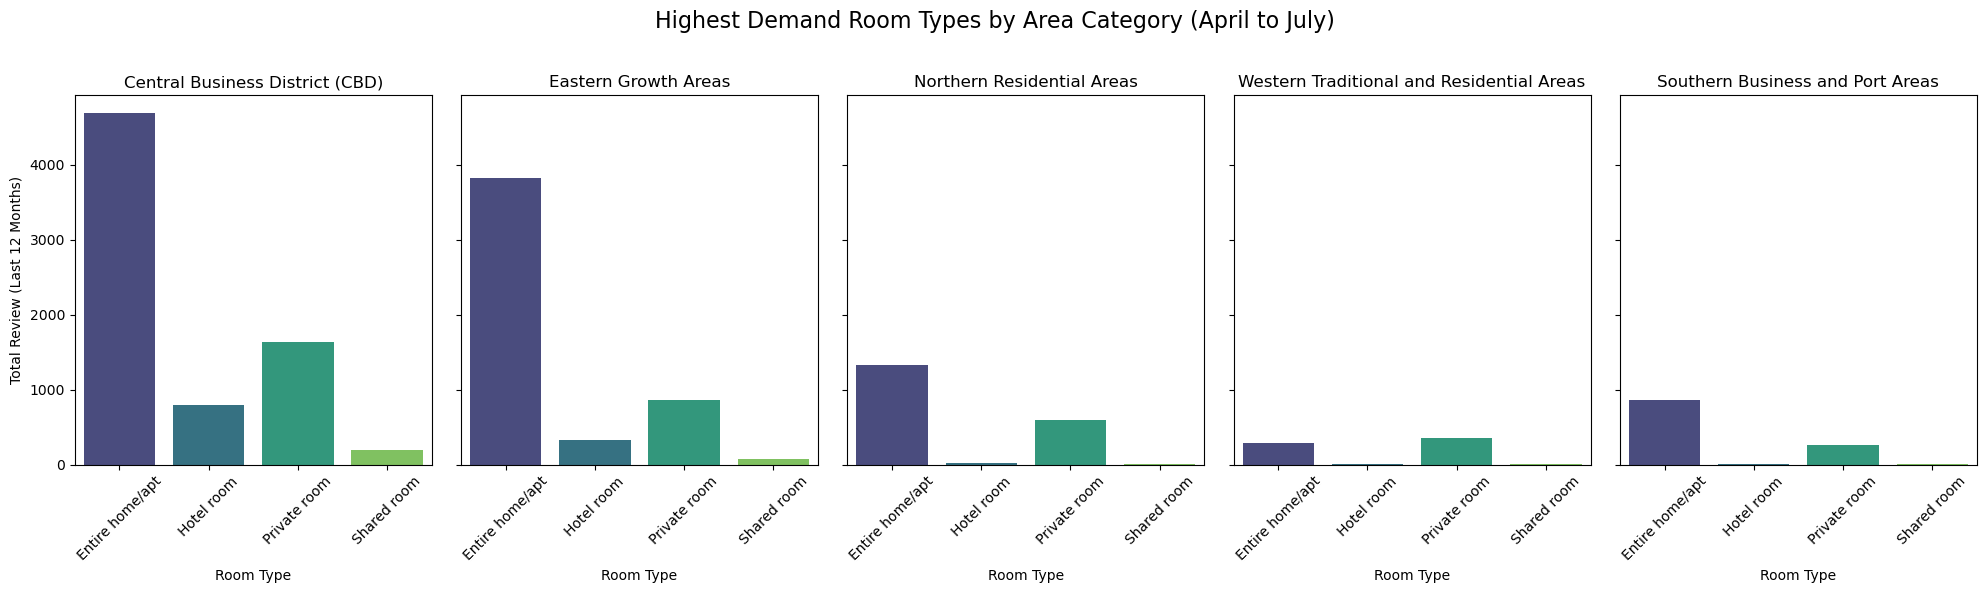

In [63]:
df_filtered = df.copy()

area_categories = df_filtered['area_category'].unique()

target_months = ['April', 'May', 'June', 'July']

fig, axes = plt.subplots(nrows=1, ncols=len(area_categories), figsize=(20, 6), sharey=True)
fig.suptitle('Highest Demand Room Types by Area Category (April to July)', fontsize=16)

for ax, area in zip(axes, area_categories):
    filtered_data = df_filtered[(df_filtered['area_category'] == area) & (df_filtered['review_month'].isin(target_months)) & (df_filtered['estimated_starting_year'] != 1900)]
    
    room_type_counts = filtered_data.groupby('room_type')['number_of_reviews'].sum().reset_index()
    room_type_counts.columns = ['room_type', 'number_of_reviews']
    
    sns.barplot(data=room_type_counts, x='room_type', y='number_of_reviews', palette='viridis', ax=ax)
    
    ax.set_title(area)
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Total Review (Last 12 Months)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [64]:
target_months = ['April', 'May', 'June', 'July']
filtered_data = df[(df['review_month'].isin(target_months)) & (df['estimated_starting_year'] != 1900)]

temp = filtered_data.groupby(['room_type'])['number_of_reviews'].sum().reset_index()
temp

room_type  number_of_reviews
0  Entire home/apt              10985
1       Hotel room               1142
2     Private room               3712
3      Shared room                271

> - **Tipe listing `rumah/apartemen` masih mendominasi walaupun pada bulan-bulan dengan `demand rendah`, tetapi terdapat peningkatan pada performa `private rooms`**
> - **`Pada bulan-bulan ini (April - July)`, pengunjung mungkin lebih sensitif terhadap anggaran, sehingga private_rooms menjadi pilihan yang menarik.**
> - **`Tren Musiman`: Selama musim liburan, house/apt mungkin lebih sulit ditemukan atau lebih mahal karena tingginya permintaan. Ini bisa menyebabkan wisatawan yang tidak dapat menemukan akomodasi yang sesuai beralih ke `private_rooms`.**

## Insights

> - **`Bulan dengan demand Tinggi` -> [`Agustus - Desember`]** 
> - **`Bulan dengan demand Rendah` -> [`April - Juli`]** 

> - **Selama periode `bulan dengan demand tinggi`, tipe listing `House/Apartemen` merupakan tipe ter-populer karena terdapat peningkatan aktivitas liburan dan perjalanan, termasuk liburan panjang akhir tahun, perayaan musim, dan acara khusus.**
> - **Periode akhir tahun merupakan periode dengan potensi revenue terbesar melihat tipe listing seperti `House/Apartemen` yang secara umum memiliki harga lebih besar dari listing lainnya.**
> - **Selama periode `bulan dengan demand rendah`, tipe listing `House/Apartemen` masih mendominasi tetapi `Private Rooms` mulai meningkat karena menawarkan opsi akomodasi yang lebih terjangkau dan fleksibel, yang menarik bagi wisatawan dengan anggaran lebih ketat**
> - **Biasanya `wisatawan` / `travelers` yang mengunjungi pada bulan-bulan tersebut mengambil kesempatan diluar periode liburan panjang saat ramai pendatang.**

<h2 style='font-weight:bold;'><span style='color:#c35347'>Kesimpulan</span></h2>

1. **Distribusi Listing dan Harga**:
   - Distribusi listing didominasi oleh area `CBD` dan `Eastern Growth Areas`, yang mencerminkan konsentrasi tinggi dari listing di area tersebut.
   - Harga properti di area dengan pertumbuhan tinggi cenderung lebih tinggi dibandingkan dengan area berpotensi, mencerminkan tingginya permintaan dan nilai pasar di area berkembang.

2. **Pertumbuhan dan Potensi Pasar Listing**:
   - **Area Dengan Pertumbuhan Tinggi**: `Khlong Toei`, `Vadhana`, dan `Ratchathewi` menunjukkan pertumbuhan yang pesat dalam jumlah listing, dengan properti seperti `rumah/apartemen` dan `hotel` mendominasi performa di area ini.
   - **Area Dengan Potensi**: `Bang Kapi`, `Samphanthawong`, dan `Phasi Charoen` menunjukkan potensi pertumbuhan yang baik. Di area ini, `rumah/apartemen` masih menjadi pilihan utama tetapi `private_rooms` menunjukkan peningkatan performa, menandakan permintaan yang kuat untuk akomodasi yang lebih terjangkau.

3. **Potensi Peningkatan Pariwisata Bangkok**: 
   - **Trend Jumlah Listing Tahunan**: Meskipun terjadi sekali penurunan selama pandemi tahun 2020, tren jangka panjang menunjukkan `potensi besar untuk pertumbuhan lebih lanjut`. Melihat peningkatan konstan jumlah listing setiap tahun dari `2015` sampai `2022`, Bangkok tetap menjadi tujuan wisata yang menarik dengan daya tarik yang terus meningkat.

4. **Periode Puncak dan Pola Pemesanan**:
   - **Bulan dengan Demand Tinggi**: `Agustus - Desember` menunjukkan peningkatan permintaan listing secara signifikan, terutama untuk tipe `House/Apartemen`. Periode ini mencakup liburan panjang, perayaan musim, dan acara khusus, yang meningkatkan aktivitas perjalanan dan akomodasi.
   - **Bulan dengan Demand Rendah**: `April - Juli` menunjukkan permintaan yang lebih rendah. Selama periode ini, tipe listing `House/Apartemen` cukup mendominasi tetapi `Private Rooms` mengalami peningkatan, menawarkan opsi akomodasi yang lebih terjangkau untuk wisatawan dengan anggaran lebih ketat.


<h2 style='font-weight:bold;'><span style='color:#c35347'>Rekomendasi</span></h2>

1. **Pengembangan Area dengan Potensi**:
   - **Kampanye Pemasaran Berfokus**: Prioritaskan kampanye pemasaran di area dengan potensi seperti `Bang Kapi`, `Samphanthawong`, dan `Phasi Charoen`. Buat materi pemasaran yang menonjolkan kelebihan dan keuntungan dari akomodasi di area ini untuk menarik lebih banyak pemilik properti.
   - **Kerja Sama dengan Komunitas Lokal**: Bangun kemitraan dengan komunitas lokal dan pemerintah daerah untuk meningkatkan kesadaran dan dukungan terhadap penyewaan Airbnb di area yang kurang berkembang.

2. **Memaksimalkan Potensi di Area dengan Pertumbuhan Tinggi**:
   - **Program Loyalitas dan Insentif**: Implementasikan program loyalitas atau insentif untuk pemilik properti di area seperti `Khlong Toei`, `Vadhana`, dan `Ratchathewi`. Tawarkan bonus atau pengurangan biaya layanan bagi pemilik yang berhasil meningkatkan jumlah listing atau memberikan pengalaman luar biasa kepada tamu.
   - **Optimalisasi Ulasan dan Rating**: Fokuskan upaya untuk meningkatkan ulasan dan rating dari tamu di area pertumbuhan tinggi. Berikan panduan dan pelatihan kepada pemilik properti untuk mengelola dan meningkatkan pengalaman tamu, serta mendorong ulasan positif.

3. **Optimasi Penetapan Harga Musiman**:
   - **Penetapan Harga Adaptif**: Terapkan penetapan harga adaptif yang menyesuaikan tarif berdasarkan musim dan pola permintaan. Tingkatkan harga selama periode puncak `Agustus - Desember`, dan tawarkan promosi dan potongan harga pada bulan-bulan dengan permintaan rendah `April - Juli` untuk menarik tamu.
   - **Paket dan Penawaran Musiman**: Buat paket dan penawaran khusus selama periode puncak untuk tipe `House/Apartemen`, dan gunakan strategi harga menarik untuk `House/Apartemen` dan `Private Rooms` selama periode off-peak.

4. **Peningkatan Kesadaran Pariwisata Bangkok**:
   - **Promosi Pariwisata dan Acara**: Fokuskan promosi pada daya tarik wisata Bangkok dan acara khusus yang menarik wisatawan internasional. Gunakan tren pertumbuhan jumlah listing sebagai kesempatan untuk memasarkan Bangkok sebagai destinasi wisata yang terus berkembang.

Dengan menerapkan rekomendasi ini, tim pemasaran dapat lebih efektif memanfaatkan peluang pertumbuhan di Bangkok, meningkatkan visibilitas listing Airbnb, dan memaksimalkan pendapatan melalui strategi yang berbasis data dan terencana.